## Project: Bank Marketing

## Project description and Dataset origin

##### The data is related to direct marketing campaigns of a banking institution in Portugal.
##### Marketing campaigns are based on telephone calls. Usually, more than one communication was made to get the product ("fixed-term deposit") to be subscribed by the client.
##### The dataset has the name bank-full.csv and is sorted by date (from May 2008 to November 2010).
##### The objective of the sorting is to predict whether the customer will subscribe to a fixed-term deposit.
##### The number of rows is 45,211 and the number of variables is 16 plus 1 output variable.
##### The dataset to be used was found in the UCI Machine Learning Repository platform.
##### Path of the dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## I. EDA

In [2]:
# The Data Cleaning and Exploratory Analysis processes of the dataset will be performed as follows.

In [3]:
# Libraries are imported for the project.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('ggplot')

In [4]:
# Read the dataset (separated by ;) in a dataframe.
df = pd.read_csv("bank-full.csv", sep=";")
df_backup = df.copy()

### 1. Dataset description

In [5]:
# 01 - age: age (numeric)
# 02 - job: job type (categorical: "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services").
# 03 - marital: marital status (categorical: "married", "divorced", "single").
# 04 - education: education level (categorical: "unknown", "secondary", "primary", "tertiary").
# 05 - default: indicator if there is any credit in red (binary: "yes", "no").
# 06 - balance: average annual income in euros (numeric).
# 07 - housing: mortage loan indicator (binary: "yes", "no").
# 08 - loan: if there is any personal credit (binary: "yes", "no").

# Variables related to the last contact of the current campaign:

# 09 - contact: communication type (categorical: "unknown", "telephone", "cellular").
# 10 - day: day of the last communication (numeric)
# 11 - month: month of the last communication (categorical: "jan", "feb", "mar", ..., "nov", "dec")
# 12 - duration: duration in seconds of the last communication (numeric).

# Other attibutes:

# 13 - campaign: number of communications made in the current campaign including the last communication (numeric).
# 14 - pdays: number of days since the customer was contacted from a previous campaign. The value -1 means that the customer was not contacted previously (numeric).
# 15 - previous: number of communications made before the current campaign (numeric).
# 16 - poutcome: result of the previous marketing campaign (categorical: "unknown", "other", "failure", "success").

# Output variable:

# 17 - y: indicates whether the customer has taken out a fixed-term deposit (binary: "yes", "no").
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
# Validate that the dataset has 45,211 rows and 17 columns.
df.shape

(45211, 17)

In [7]:
# The structure of the dataset is displayed (columns, whether it contains nulls/empties and the data type).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# The statistics of the numerical columns of the dataset such as number of rows, average, minimum value, maximum value, percentiles, etc. are displayed.
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Validate if duplicate rows exist. No duplicate rows exist.
df.duplicated().sum()

0

### 2. Analysis of variables

#### 2.1. Analysis of "age" variable

<AxesSubplot:ylabel='Frequency'>

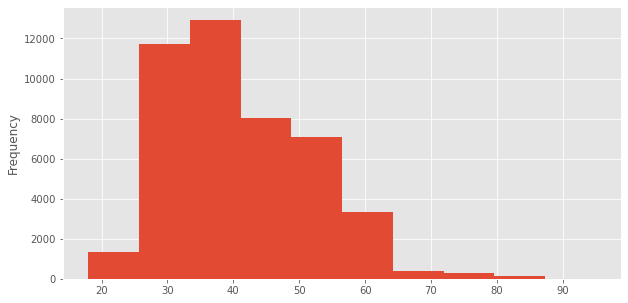

In [10]:
df["age"].plot.hist()

# The histogram indicates that most of the people in the dataset are between 30 and 40 years of age. There is also an important group of people between 40 and 60 years of age.

#### 2.2. Analysis of "balance" variable

<AxesSubplot:ylabel='Frequency'>

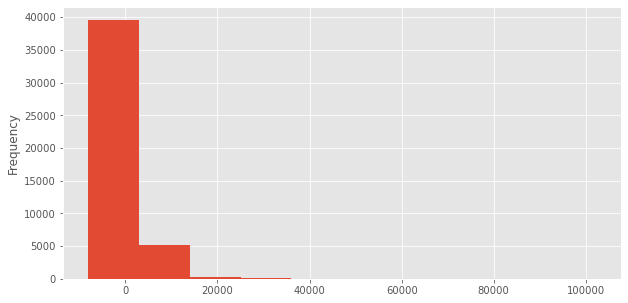

In [11]:
df["balance"].plot.hist()

# The following graph shows that approximately 40,000 customers have an average balance of 3044 euros.

#### 2.3. Analysis of "day" variable

<AxesSubplot:ylabel='Frequency'>

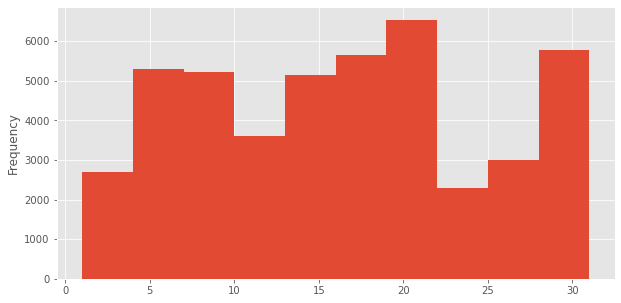

In [12]:
df["day"].plot.hist()

# The histogram shows that the days where the marketing campaign is most intensified are between 5 - 10, 13 - 22 and 27 - 30 of each month,
# while the days with the least communication with potential customers are between 1 - 4, 10 - 13 and 22 - 27 of each month.

#### 2.4. Analysis of "duration" variable

In [13]:
df["duration"].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<AxesSubplot:>

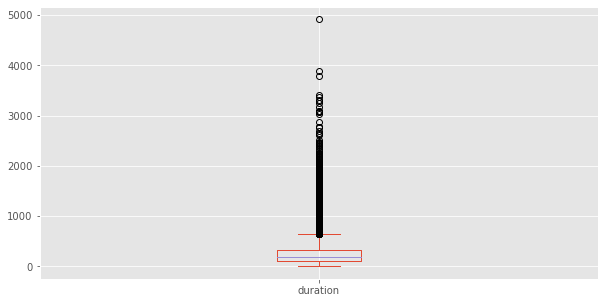

In [14]:
df["duration"].plot.box()

# The box-and-whisker plot shows that the mean duration of telephone communications is around 258 seconds (4.3 minutes).
# The 25% percentile is around 103 seconds (1.7 minutes). The 75% percentile is around 319 seconds (5.3 minutes).
# While the outliers are over 800 seconds (13 minutes) reaching a maximum of 4,918 seconds (1 hour and 21 minutes).
# We can observe that the number of calls that are over 13 minutes is not less.


#### 2.5. Analysis of "campaign" variable

In [15]:
df["campaign"].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

<AxesSubplot:>

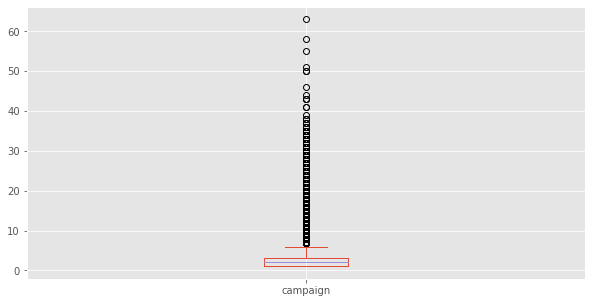

In [16]:
df["campaign"].plot.box()

# The box-and-whisker plot shows that the average number of communications made in the current campaign is around 2.76.
# The 25% percentile is around 1 communication. The 25% percentile is around 1 communication. The 75% percentile is around 3 communications.
# The outliers are above 3 communications reaching a maximum of 63 communications.

#### 2.6. Analysis of "pdays" variable

In [17]:
df["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<AxesSubplot:ylabel='Density'>

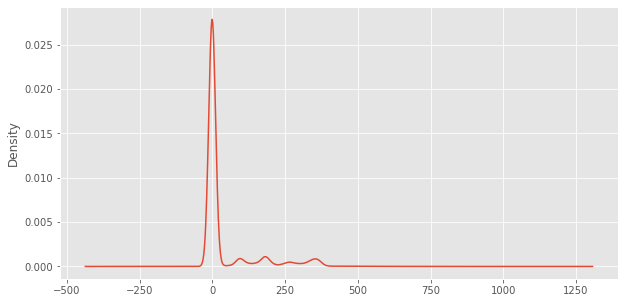

In [18]:
df["pdays"].plot.density()

# In the density graph, it is described that the largest percentage of customers were not contacted from a previous campaign.
# Of the customers contacted, an average of 24 days have passed since the last time a customer was contacted for a previous campaign.

#### 2.7. Analysis of "previous" variable

<AxesSubplot:ylabel='Frequency'>

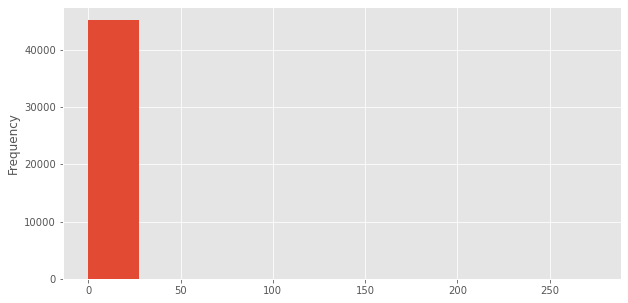

In [19]:
df["previous"].plot.hist()

# The histogram shows that the vast majority of previous calls made to users remain in the range of less than 50 calls.

#### 2.8. Analysis of "job" variable

<AxesSubplot:>

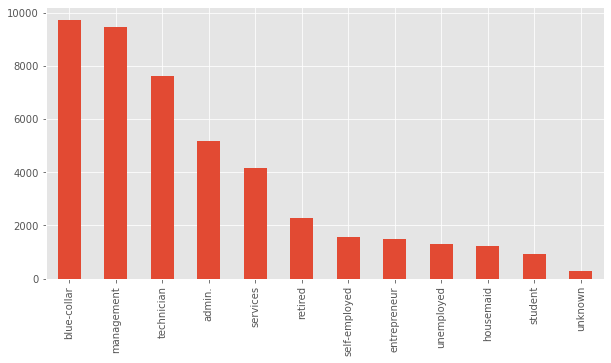

In [20]:
df["job"].value_counts().plot.bar()

# It is possible to appreciate the collection of job categories that have been found within the dataset obtained,
# at the same time we can say that the largest group contacted by the campaign have been blue collar, management and technician.

In [21]:
df["job"].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

#### 2.9. Analysis of "marital" variable

<AxesSubplot:ylabel='marital'>

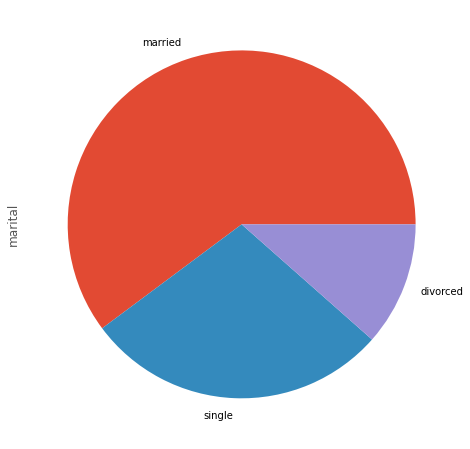

In [22]:
df["marital"].value_counts().plot.pie(figsize=(8,8))

# The pie chart shows that the highest percentage of clients in our dataset are people with a "married" marital status,
# with a lower percentage of clients with a "single" marital status, followed by "divorced" clients.
# It should be noted that the divorced category also includes widowed people.

In [23]:
df["marital"].value_counts(normalize=True)

# It is observed that the highest percentage of clients in our dataset are married people (60%),
# followed by single people (28%) and divorced people (almost 12%).

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

#### 2.10. Analysis of "education" variable

<AxesSubplot:>

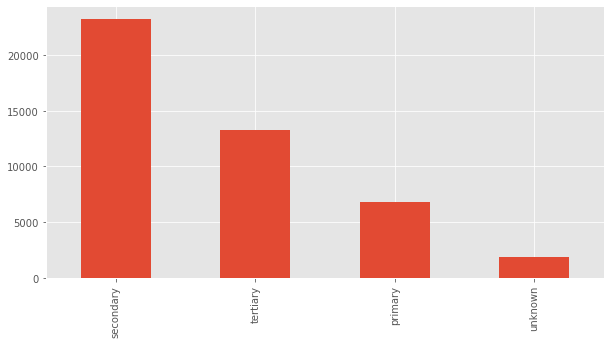

In [24]:
df["education"].value_counts().plot.bar()

# The following graph shows that the majority of the clients belong to the secondary education level.

In [25]:
df["education"].value_counts(normalize=True)

# In the following table we see the relative frequency for each grade of education, including the unknown grade that represents 4% of the universe.

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

#### 2.11. Analysis of "default" variable

<AxesSubplot:>

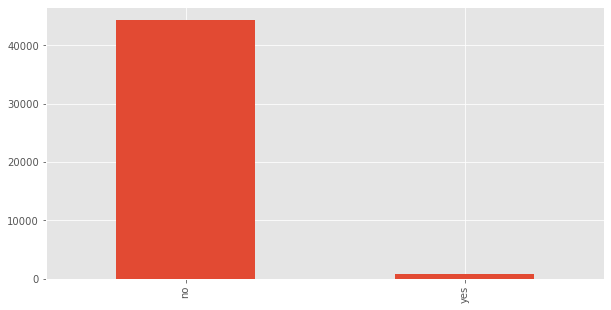

In [26]:
df["default"].value_counts().plot.bar()

# The following graph shows that the majority of clients do not have any credit in "red".

In [27]:
df["default"].value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

#### 2.12. Analysis of "housing" variable

<AxesSubplot:ylabel='housing'>

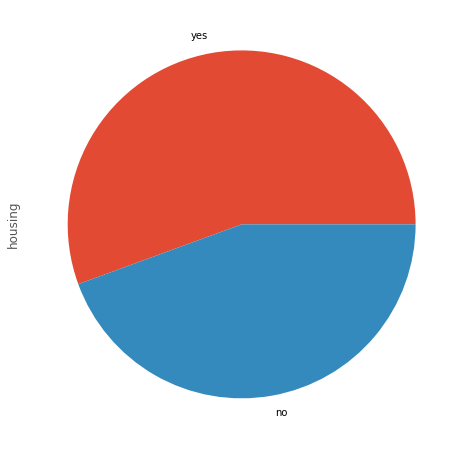

In [28]:
df["housing"].value_counts().plot.pie(figsize=(8,8))

# The following diagram shows that while there is a majority of people who have a mortgage loan, it is not an overwhelming majority.
# It can be concluded that the data sample has diverse cases between owning a mortgage loan and not owning a mortgage loan.
# The percentage of people with a mortgage loan is 55% while 45% do not have a mortgage loan.

In [29]:
df["housing"].value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

#### 2.13. Analysis of "loan" variable

<AxesSubplot:ylabel='loan'>

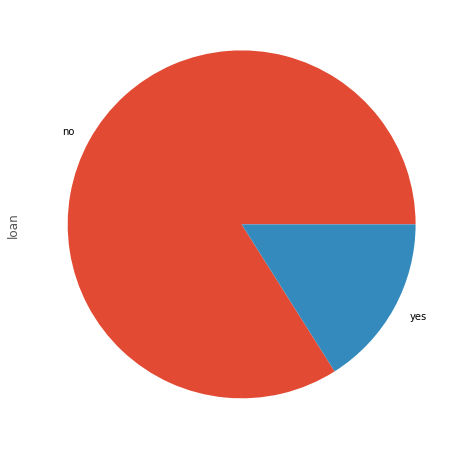

In [30]:
df["loan"].value_counts().plot.pie(figsize=(8,8))

# The pie chart shows that the largest percentage of clients in our dataset do not have a personal loan.

In [31]:
df["loan"].value_counts(normalize=True)

# It can be seen that the largest percentage of clients in our dataset, 84%, are people who do not have a personal loan,
# and 16% are clients who already have a personal loan.

no     0.839774
yes    0.160226
Name: loan, dtype: float64

#### 2.14. Analysis of "contact" variable

<AxesSubplot:ylabel='contact'>

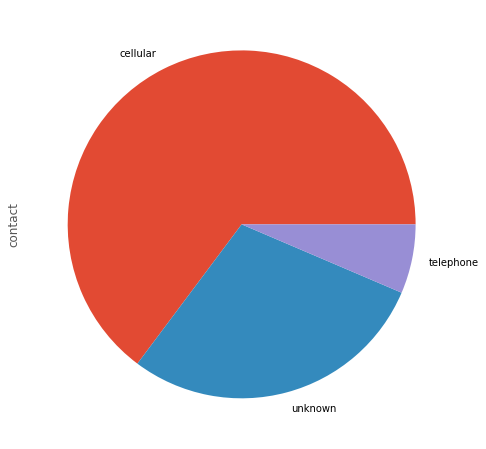

In [32]:
df["contact"].value_counts().plot.pie(figsize=(8,8))

# In the pie chart, it can be seen that clients have been contacted in a higher percentage through "Cellular" and in a lower percentage through "Telephone".
# We also observe that there is an intermediate percentage of people contacted by unknown means.

In [33]:
df["contact"].value_counts(normalize=True)

# It is observed that the highest percentage of contact made with customers is through "Cellular" in approximately 65%,
# and through "Telephone" in approximately 6%, while through unknown means in 29%.

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

#### 2.15. Analysis of "month" variable

<AxesSubplot:>

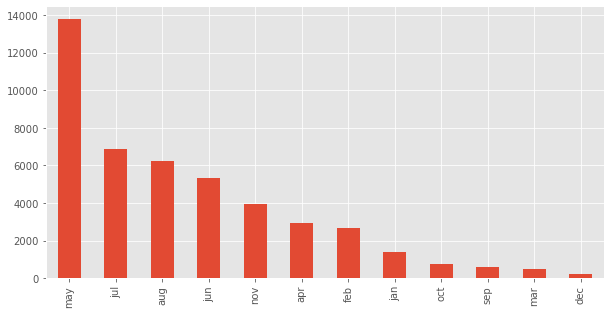

In [34]:
df["month"].value_counts().plot.bar()

# In the bar chart it can be seen that the month where the marketing campaign communication intensified was in May, followed by July and August;
# while the month where the campaign communication was low was in December, followed by September and March; and the regular months were June, November and April.

In [35]:
df["month"].value_counts(normalize=True)

# In the normal distribution of the last month of communication it can be observed that the highest month represents 30% of the marketing campaign communications,
# a considerable value with respect to the other months, while the months of October, September, March and December each represent less than 1.6% of the campaign communications,
# these months are below 2%. This could eventually result in all of these months being considered as a single category that would represent a combined 4.2% of the communications.

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

#### 2.16. Analysis of "poutcome" variable

<AxesSubplot:>

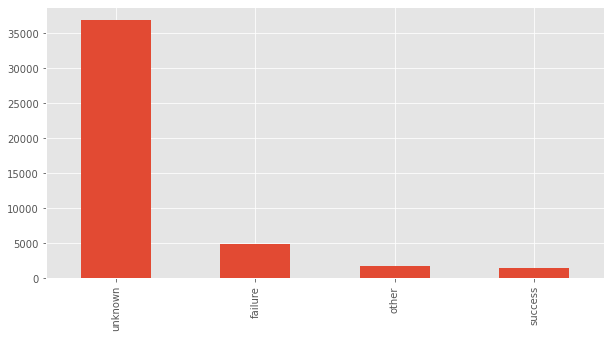

In [36]:
df["poutcome"].value_counts().plot.bar()

# In conclusion, as can be seen in the graph, most of the people contacted have not participated in a marketing campaign,
# just as we can say that the other percentage of people who did manage to participate in the previous campaign did not conclude with an affirmative response and
# it should be analyzed why it happened this way.

In [37]:
df["poutcome"].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

#### 2.17. Analysis of "y" variable

<AxesSubplot:ylabel='y'>

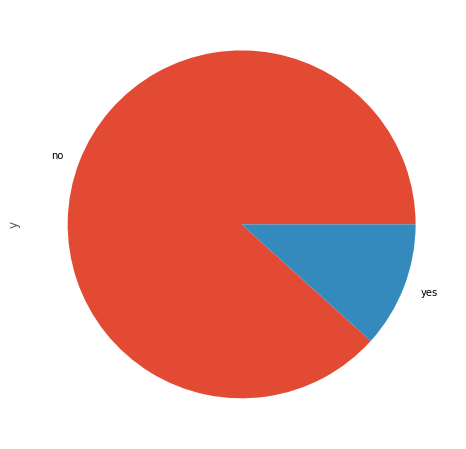

In [38]:
df["y"].value_counts().plot.pie(figsize=(8,8))

# In conclusion, it can be said that the marketing campaign has failed because there has not been good acceptance by the people who have been contacted.

In [39]:
df["y"].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

#### 2.18. Correlation analysis between all variables and correlation heat map between all variables.

<AxesSubplot:>

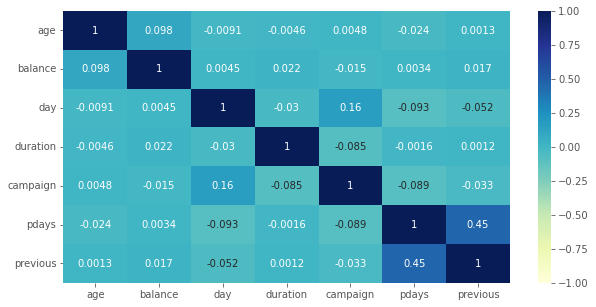

In [40]:
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

# It is shown that none of the relationships between different variables is close to 1 or -1. This means that all variables can contribute relevant information to the model;
# it is not necessary to disregard any variable.

In [41]:
# A dataframe is generated with the records that produced a "yes" output.
df_yes = df.copy()
df_yes = df_yes[df_yes["y"] == "yes"]

In [42]:
# A dataframe is generated with the records that produced a "no" output.
df_no = df.copy()
df_no = df_no[df_no["y"] == "no"]

### 3. Analysis of cross-checking information

#### 3.1. Crossover analysis for "age" variable

<AxesSubplot:xlabel='Age'>

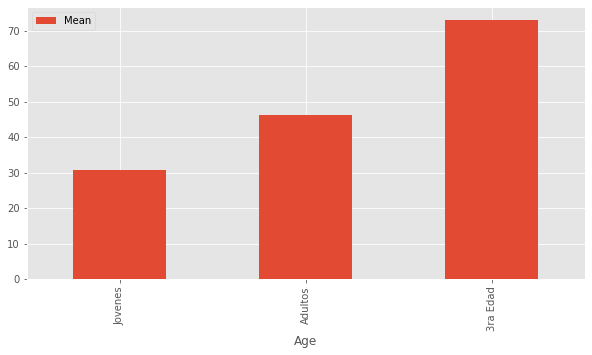

In [43]:
# We will proceed to group people into 3 age groups:
# Young people: People under 35 years of age.
# Adult persons: Persons between 35 and 65 years old.
# Elderly people: People older than 65 years old.

df_ages = df
df_ageolder = df_ages.loc[df_ages["age"] >= 65]
df_age35_65 = df_ages.loc[df_ages["age"] > 35]
df_age35_65 = df_age35_65.loc[df_age35_65["age"] < 65]
df_age35 = df_ages.loc[df_ages["age"] <= 35]

# Let's analyze the average age of each group.

agesmean = [('Jovenes', df_age35["age"].mean()),('Adultos', df_age35_65["age"].mean()), ('3ra Edad', df_ageolder["age"].mean())]
df_agesmean = pd.DataFrame(agesmean, columns=['Age', 'Mean'])
df_agesmean.plot.bar(x = 0, y = 1)

# The following histogram shows that the average age of each group is:
# For young people the average age is 30 years.
# For adults the average age is around 46 years.
# For the third age group the average age is around 73 years.

#### 3.2. Crossover analysis for "job" variable

In [44]:
ddf = df["job"].unique()
print(ddf)

# We can see the collection of classifications that we would have in the "job" attribute, which is a collection of 12 classifications.

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [45]:
hist = df["job"].value_counts()
hist

# As can be seen, most of the people who participated in the marketing campaign are Blue Collar.

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

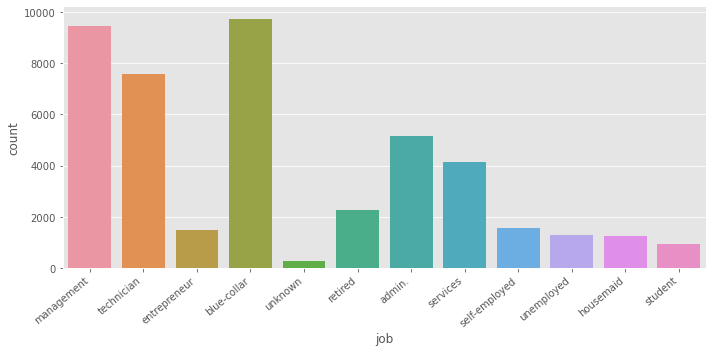

In [46]:
df_t = df[["job", "y"]]
ax = sns.countplot(x="job", data=df_t)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# We can see graphically the participation in the advertising campaign of the people classified by jobs and we can see the difference in participation of each one of them with respect to the other.

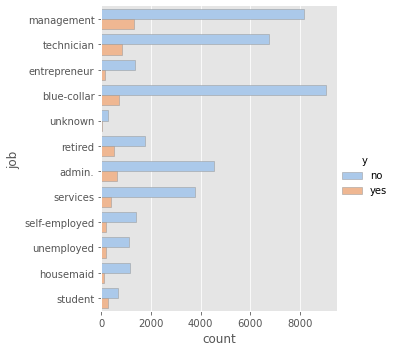

In [47]:
df_t = df[["job", "y"]]
sns.catplot(
    data=df_t, y="job", hue="y", kind="count",
    palette="pastel", edgecolor=".6",
)

# In conclusion we can say that although the largest number of people contacted are in the blue collar collection, they are a group that has not had an affirmative response to the campaign,
# we have a similar case with management and technician while on the other hand, we can see that there is a very good acceptance of the campaign in students and retirees
# but there are few people belonging to these groups who could participate in the campaign, with this conclusion we could change the focus of the campaign or
# the way to carry it to obtain a greater number of recruits.

#### 3.3. Crossover analysis for "marital" variable

In [48]:
df_marital = pd.DataFrame()
df_marital['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
df_marital['no'] = df[df['y'] == 'no']['marital'].value_counts()

<AxesSubplot:title={'center':"'marital' vs 'y'"}>

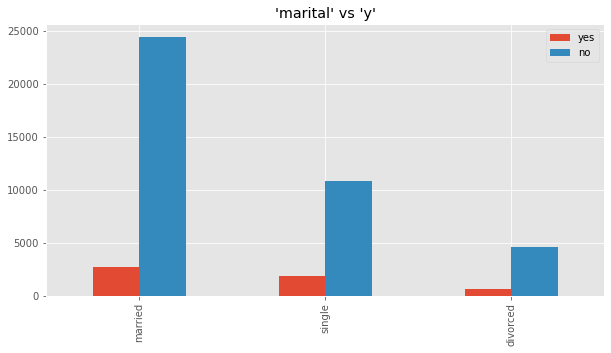

In [49]:
df_marital.plot.bar(title = "'marital' vs 'y'")

# In the graph we can see that the clients who mostly access a time deposit are those who are married, while divorced or widowed clients access a time deposit to a lesser extent.
# Single people are in the intermediate percentage of predisposition to acquire the product.

#### 3.4. Crossover analysis for "education" and "default" variables

In [50]:
# default: do you have credit in default? (categorical: "no", "yes")
e_df = pd.DataFrame()
e_df['yes_default'] = df[df['default'] == 'yes']['education'].value_counts()
e_df['no_default'] = df[df['default'] == 'no']['education'].value_counts()
e_df

,yes_default,no_default
secondary,458,22744
tertiary,198,13103
primary,127,6724
unknown,32,1825


<AxesSubplot:title={'center':'Education vs Default'}>

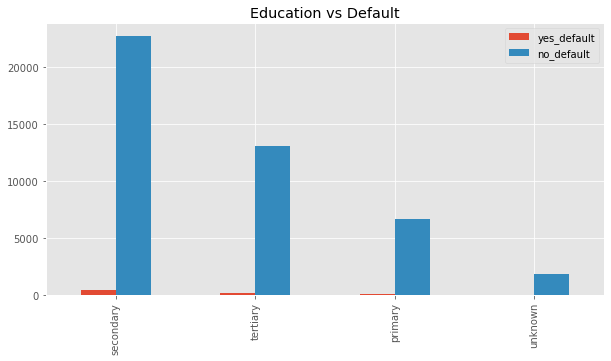

In [51]:
# Crossover analysis for the variables "Education" vs "Default" in a bar chart.
e_df.plot.bar(title = 'Education vs Default')

# The graph shows that the majority of clients are high school educated, and at the same time most of them have defaulted on their loans.

<AxesSubplot:xlabel='education'>

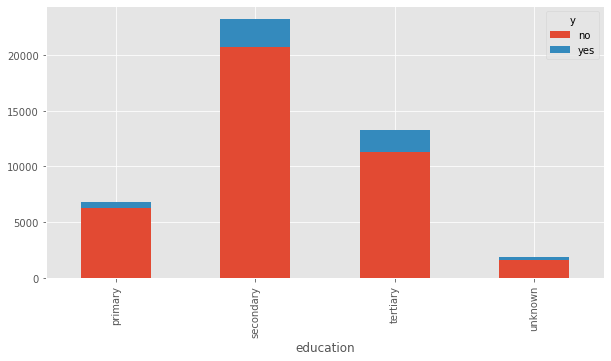

In [52]:
# Crossover analysis for the variables "Education" vs "y" in a bar chart.
types = df.groupby("education")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

# The graph shows that most of the clients belong to the secondary education category.
# The tertiary education category has a higher proportion of clients who say yes to term deposit than any other category.

#### 3.5. Crossover analysis for "balance" variable

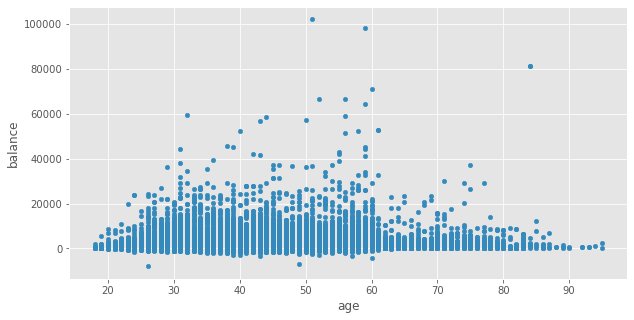

In [53]:
# Crossover analysis for the variables "Age" vs "Balance" in Scatter graph.
# balance: average annual balance.
df.plot(kind='scatter', x='age', y='balance');

# The graph shows that those with the highest average annual balance are between the ages of 50 and 60.

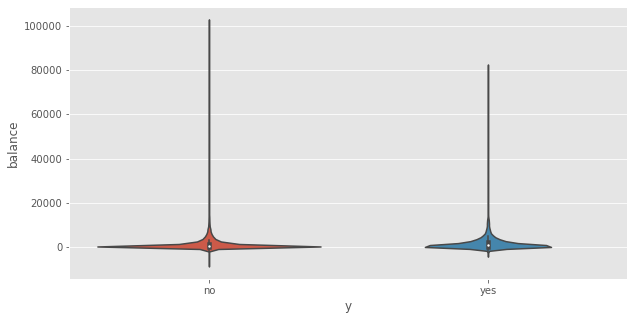

In [54]:
# Crossover analysis for the variables "y" vs "Balance" in Violin graph.
sns.violinplot(x="y", y="balance", data=df, size=8)
plt.show()

# The graph shows that the top earners do not tend to have a term deposit account.

#### 3.6. Crossover analysis for "housing" variable

<AxesSubplot:ylabel='Personas 3ra Edad'>

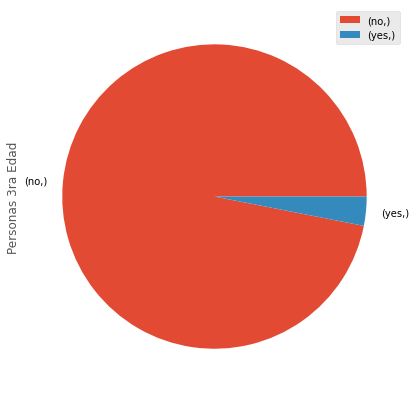

In [55]:
# First we will review the proportion of mortgage loans in the elderly group.
df_ageolder[["housing"]].value_counts().plot.pie(figsize=(7,7), legend= True, ylabel = 'Personas 3ra Edad')

# It can be determined that the majority of elderly group do not have active mortgage loans.

<AxesSubplot:ylabel='Personas Adultas'>

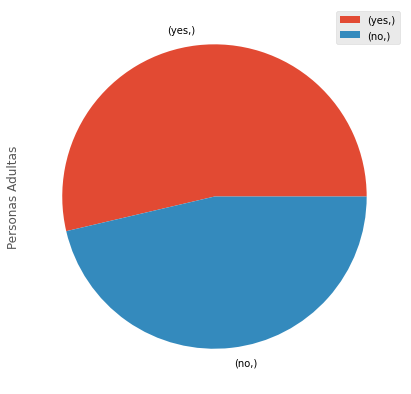

In [56]:
# We will now review the proportion of mortgage loans in the adult group.
df_age35_65[["housing"]].value_counts().plot.pie(ylabel = 'Personas Adultas', figsize=(7,7), legend= True)

# It can be determined that there is no trend in mortgage lending for adults between the ages of 35 and 65.

<AxesSubplot:ylabel='Personas Jovenes'>

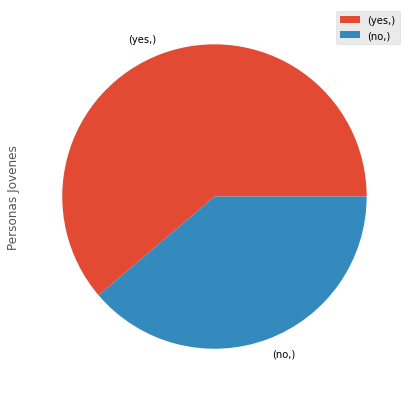

In [57]:
# We will now review the proportion of mortgage lending by the younger age group.
df_age35[["housing"]].value_counts(normalize=True).plot.pie(figsize=(7,7), legend=True, ylabel='Personas Jovenes')

# It can be determined that younger people have mostly active mortgage loans although they are not an overwhelming majority.

#### 3.7. Crossover analysis for "loan" variable

In [58]:
df_loan = pd.DataFrame()
df_loan['yes'] = df[df['y'] == 'yes']['loan'].value_counts()
df_loan['no'] = df[df['y'] == 'no']['loan'].value_counts()

<AxesSubplot:title={'center':"'loan' vs 'y'"}>

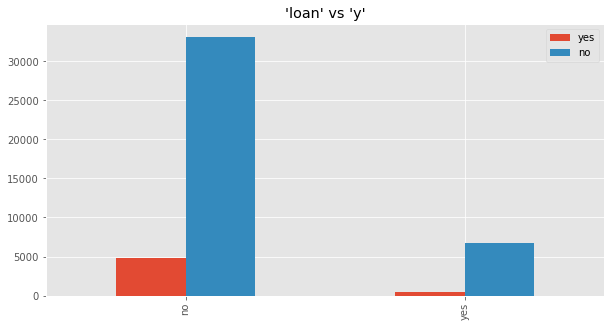

In [59]:
df_loan.plot.bar(title = "'loan' vs 'y'")

# In the graph we can see that clients who do not have a personal loan are more likely to acquire a fixed-term deposit.

#### 3.8. Crossover analysis for "contact" variable

In [60]:
df_contact = pd.DataFrame()
df_contact['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
df_contact['no'] = df[df['y'] == 'no']['contact'].value_counts()

<AxesSubplot:title={'center':"'contact' vs 'y'"}>

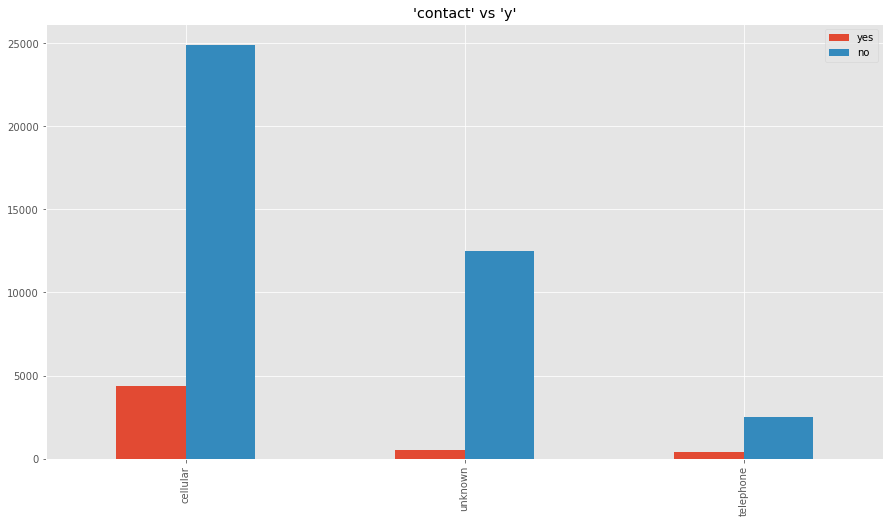

In [175]:
df_contact.plot.bar(title="'contact' vs 'y'")

# In the graph we can see that the most effective means of communication for a client to acquire a fixed-term deposit is the cellular.

#### 3.9. Crossover analysis for "day" variable

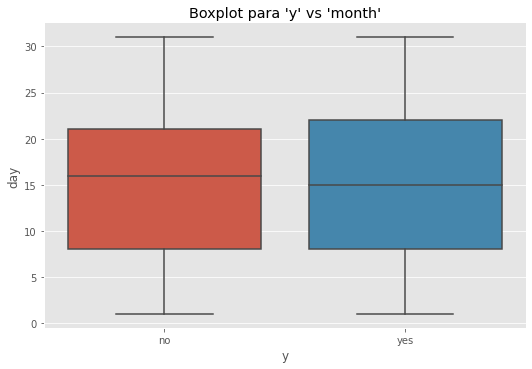

In [62]:
sns.catplot(x="y", y="day", data=df, kind="box", aspect=1.5)
plt.title("Boxplot para 'y' vs 'month'")
plt.show()

# The graph shows that the average of the last communication for the marketing campaign was in the middle of the month, between the 8th and 22nd.
# It can be deduced that the marketing campaign had more intensity on these days.

#### 3.10. Crossover analysis for "month" variable

In [63]:
df_month = pd.DataFrame()
df_month['yes'] = df[df['y'] == 'yes']['month'].value_counts()
df_month['no'] = df[df['y'] == 'no']['month'].value_counts()

<AxesSubplot:title={'center':"'month' vs 'y'"}>

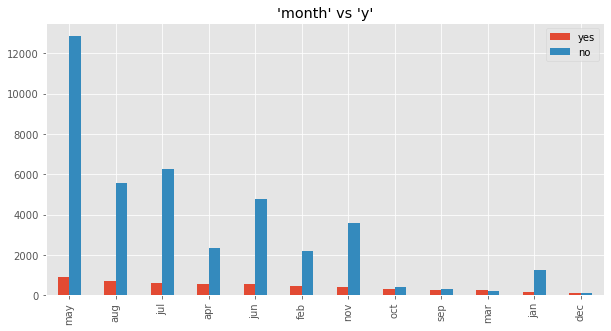

In [64]:
df_month.plot.bar(title = "'month' vs 'y'")

# The graph shows that the months of May, August and July produced the highest conversion for the marketing campaign, while the months of March, January and December produced the lowest conversion.
# It is also observed that the months of May, August and July produced the highest rejection for the marketing campaign, while the months of September, March and December produced the lowest rejection.

# Regardless of the outcome of the marketing campaign, it can be deduced that the months of May, August and July were the months that the campaign was most intensive,
# while the months of March and December were the months that had the least amount of push from the marketing staff.

#### 3.11. Crossover analysis for "duration" variable

In [65]:
df_month = pd.DataFrame()
df_month['yes'] = df_yes.describe().duration
df_month['no'] = df_no.describe().duration
df_month

,yes,no
count,5289.000000,39922.000000
mean,537.294574,221.182806
std,392.525262,207.383237
min,8.000000,0.000000
25%,244.000000,95.000000
50%,426.000000,164.000000
75%,725.000000,279.000000
max,3881.000000,4918.000000


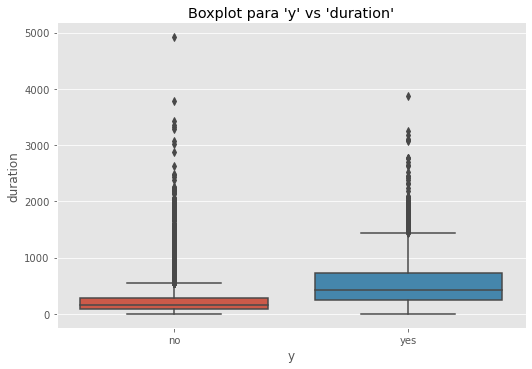

In [66]:
sns.catplot(x="y", y="duration", data=df, kind="box", aspect=1.5)
plt.title("Boxplot para 'y' vs 'duration'")
plt.show()

# The graph shows that the average duration of communications that produced a negative result is 221 seconds (3.6 minutes),
# while the average duration of communications that produced a positive result is 537 seconds (8.9 minutes).
# As expected, the communications that produced a negative result are on average shorter than those that produced a positive result.
# What is surprising is that the longest lasting campaign communications produced a negative result.

In [67]:
# Crossover analysis of information for the variable "campaign".
df[["campaign", "loan"]]
print(df[df["loan"] == "yes"]["campaign"].count())  # 7244 registers
print(df[df["loan"] == "no"]["campaign"].count())  # 37967 registers
print(f'Porcentaje de campaña para clientes que tienen un crédito personal: {df[df["loan"] == "yes"]["campaign"].shape[0] / df.shape[0] * 100:.2f}%')
print(f'Porcentaje de campaña para clientes que not tienen un crédito personal: {df[df["loan"] == "no"]["campaign"].shape[0] / df.shape[0] * 100:.2f}%')

# campaign: number of communications made in the current campaign including the last communication.
# loan: if there is a personal credit (binary: "yes", "no").
# It is concluded that communications for a current campaign are mostly oriented to those clients who do not have a personal loan.

7244
37967
Porcentaje de campaña para clientes que tienen un crédito personal: 16.02%
Porcentaje de campaña para clientes que not tienen un crédito personal: 83.98%


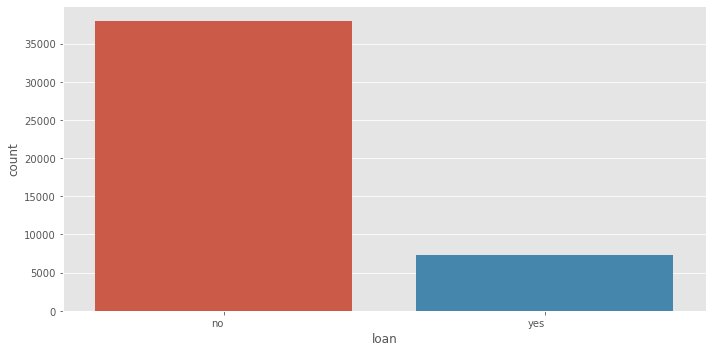

In [68]:
df_t = df[["loan", "campaign"]]
ax = sns.countplot(x="loan", data=df_t)
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()

# This graph shows that the communications for a current campaign are oriented mainly to those clients who do not have a personal loan.

#### 3.12. Crossover analysis for "pdays" variable

In [69]:
df[df['pdays'] == -1]['pdays'].count()

# pdays: number of days since the customer was contacted from a previous campaign.
# The value -1 represents that the customer was not contacted.
# Number of customers who were not contacted for a campaign.

36954

In [70]:
# Replacement of the value -1 by 0. Creation of a new variable "flg_contacted",
# where the value of 1 represents if the customer was contacted; and 0, not contacted.
df['flg_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['flg_contacted']].value_counts()

flg_contacted
0                36954
1                 8257
dtype: int64

<AxesSubplot:title={'center':'Usuarios contactados'}, ylabel='Porcentaje'>

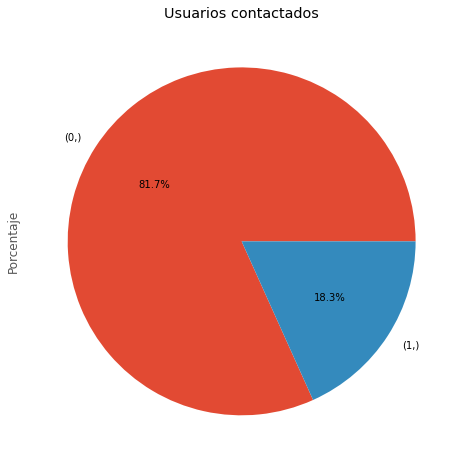

In [71]:
df[['flg_contacted']].value_counts(normalize=True).plot.pie(
    ylabel="Porcentaje", title="Usuarios contactados", figsize=(8,8), autopct='%1.1f%%')

In [72]:
# From the graph we deduce that out of a total of 45211 records:
# * 36954 people were never contacted
# * 8257 are users contacted by a campaign.

print("Cantidad de Clientes que no han sido contactados en la última campaña: ", len(df[df.pdays == -1]))
print("Número máximo de dias del último contacto con un cliente:", df['pdays'].max())
print(f'Porcentaje de clientes que no fueron contactados en la última campaña: {df[df["pdays"] == -1].shape[0] / df.shape[0] * 100:.2f}%')
print(f'Pocentaje de clientes contactados el mismo dia: {df[df["pdays"] == 0].shape[0] / df.shape[0] * 100:.2f}%')
print(f'Porcentaje de clientes contactados después de un dia: {df[df["pdays"] == 1].shape[0] / df.shape[0] * 100:.2f}%')

Cantidad de Clientes que no han sido contactados en la última campaña:  36954
Número máximo de dias del último contacto con un cliente: 871
Porcentaje de clientes que no fueron contactados en la última campaña: 81.74%
Pocentaje de clientes contactados el mismo dia: 0.00%
Porcentaje de clientes contactados después de un dia: 0.03%


In [73]:
# pdays variable and integration with other variables:
# pdays: number of days since the client was contacted from a previous campaign.
# y: indicates whether the client has taken out a fixed-term deposit (binary: "yes", "no").
# Pearson correlation coefficient value: 0.104, between the variables "pdays", and "y", expresses a weak correlation.

df['flg_y'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
print(f'Coeficiente Pearson correlación (pdays vs y): {df["pdays"].corr(df["flg_y"]):.3f}')

Coeficiente Pearson correlación (pdays vs y): 0.104


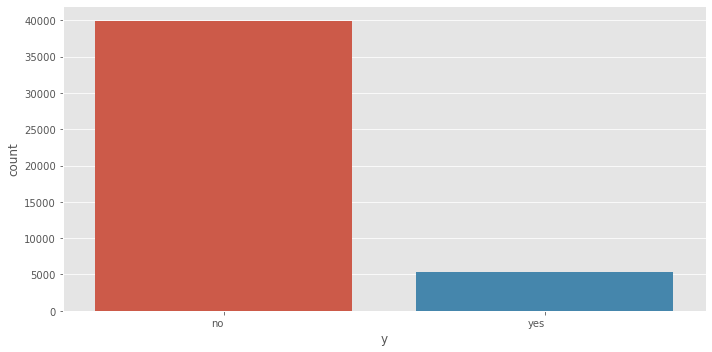

In [74]:
df_t = df[["pdays", "y"]]
ax = sns.countplot(x="y", data=df_t)
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()

# This graph shows that the more days the client was contacted, the lower the probability that the client has contracted a fixed-term deposit.

#### 3.13. Crossover analysis for "previous" variable

<AxesSubplot:title={'center':'Llamadas previas vs Plazo fijo'}>

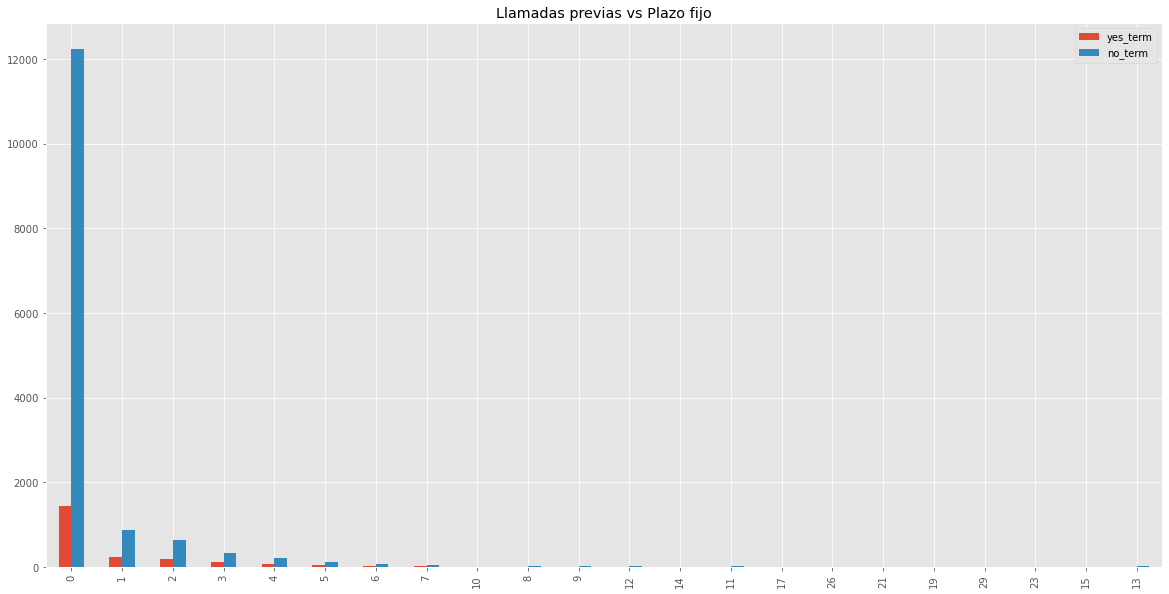

In [75]:
# We will now review the analysis of people who have a fixed-term deposit account with the number of previous calls that were made in previous campaigns.
# The analysis will be sectioned first for young people.

e_dfages35 = pd.DataFrame()
e_dfages35['yes_term'] = df_age35[df_age35['y'] == 'yes']['previous'].value_counts()
e_dfages35['no_term'] = df_age35[df_age35['y'] == 'no']['previous'].value_counts()
e_dfages35
e_dfages35.plot.bar(title = 'Llamadas previas vs Plazo fijo', figsize=(20,10))

# According to the graph shown, it can be observed that the vast majority of people do not have fixed-term accounts and have not had calls from previous campaigns.
# This indicator leads us to think that young people are a market to be taken into account since most of them have not received previous offers.

<AxesSubplot:title={'center':'Llamadas previas vs Plazo fijo'}>

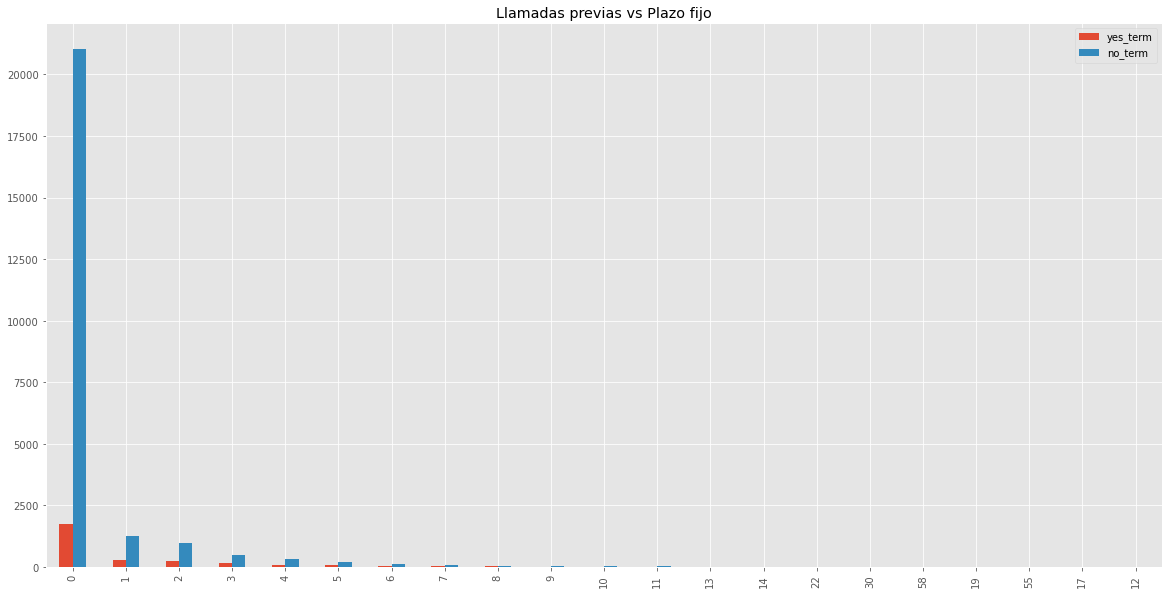

In [76]:
# We will now perform the same analysis for adult people.

e_dfages35_65 = pd.DataFrame()
e_dfages35_65['yes_term'] = df_age35_65[df_age35_65['y'] == 'yes']['previous'].value_counts()
e_dfages35_65['no_term'] = df_age35_65[df_age35_65['y'] == 'no']['previous'].value_counts()
e_dfages35_65.plot.bar(title = 'Llamadas previas vs Plazo fijo', figsize=(20,10))

# According to the graph shown, it can be observed that the vast majority of adults do not have fixed-term accounts and have not received calls from previous campaigns.
# This indicator leads us to think that adults are also a market to be taken into account since most of them have not received previous offers.

<AxesSubplot:title={'center':'Llamadas previas vs Plazo fijo'}>

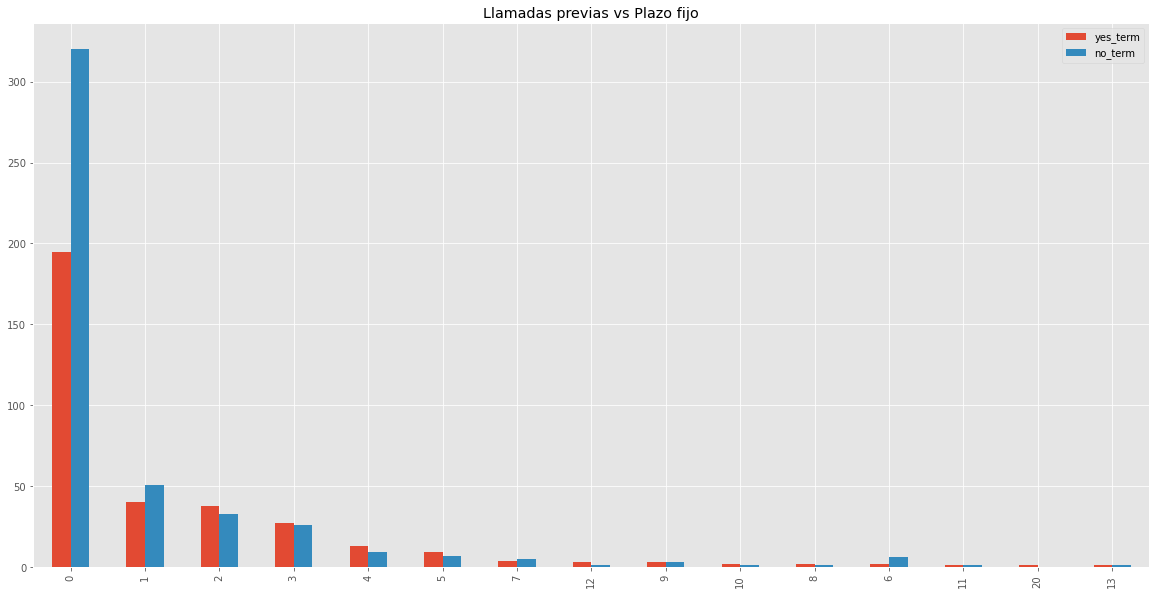

In [77]:
# We will now perform the same analysis for the elderly people.

e_dfages65 = pd.DataFrame()
e_dfages65['yes_term'] = df_ageolder[df_ageolder['y'] == 'yes']['previous'].value_counts()
e_dfages65['no_term'] = df_ageolder[df_ageolder['y'] == 'no']['previous'].value_counts()
e_dfages65.plot.bar(title = 'Llamadas previas vs Plazo fijo', figsize=(20,10))

# According to the graph shown, it can be observed that there is a majority of elderly people who do not have fixed-term accounts and have not had calls from previous campaigns.
# This indicator also shows that there is a higher number of cases with fixed-term accounts despite not having calls.
# This leads us to conclude that elderly people are more likely to open term accounts of their own free will.


## II. Feature Engineering

In [78]:
# The two procedures suggested in class were carried out. 
# METHOD 1: Functions were used to apply each transformation method for a better step-by-step visibility.
# METHOD 2: Pipelines were used for a more transparent implementation and better runtime performance.
# The following acronyms are defined for the function used:
# mm = MinMaxScaler
# ss = StandardScaler
# oe = OrdinalEncoder
# ohe = OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
df = df_backup.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### 1. Se transformaron las variables "default", "housing", "loan" y el target "y" a valores numéricos

In [79]:
# yes = 1
# no = 0
df["default"] = df_backup["default"].map({"yes": 1, "no": 0})
df["housing"] = df_backup["housing"].map({"yes": 1, "no": 0})
df["loan"] = df_backup["loan"].map({"yes": 1, "no": 0})
df["y"] = df_backup["y"].map({"yes": 1, "no": 0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


### 2. Se eliminan los valores "unknown" en la variable "education"

In [80]:
# Se eliminan los valores "unknown" en la variable "education" para después transformar los datos con OrdinalEncoder, 
# ya que el valor "unknown" no representa un valor válido de la categoría.
df = df[df['education'] != "unknown"]
df = df.reset_index(drop=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
4,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
43350,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
43351,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
43352,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


### 3. Transformación de las demás columnas usando los métodos MinMaxScaler, StarndardScaler, OrdinalEncoder y OneHotEncoder

In [81]:
# A continuación se mostrará la transformación de las demás columnas usando los métodos MinMaxScaler, StarndardScaler, OrdinalEncoder y OneHotEncoder. 
# Se realizaron los dos métodos vistos en clase: Metodo 1 - usando funciones y Método 2 - usando Pipelines

#### 3.1. Método 1: Usando funciones

In [82]:
# Definición de función para aplicar MinMaxScaler
def applyMinMaxScaler(elements, columns):
    scaler = MinMaxScaler()
    array_minmax = scaler.fit_transform(elements)
    df_minmax = pd.DataFrame(array_minmax, columns=columns)    
    return df_minmax

In [83]:
# Definición de función para aplicar StandardScaler
def applyStandardScaler(elements, columns):
    scaler = StandardScaler()
    array_standard = scaler.fit_transform(elements)
    df_standard = pd.DataFrame(array_standard, columns=columns)    
    return df_standard

In [84]:
# Definición de función para aplicar OrdinalEncoder
def applyOrdinalEncoder(categories, elements, columns):
    encoder = OrdinalEncoder(categories=categories)
    array_ordinal = encoder.fit_transform(elements)
    df_ordinal = pd.DataFrame(array_ordinal, columns=columns)    
    return df_ordinal

In [85]:
# Definición de función para aplicar OneHotEncoder
def applyOneHotEncoder(elements, columns):
    encoder = OneHotEncoder(sparse=False)
    array_onehotencoder = encoder.fit_transform(elements)
    
    new_col_names = []
    for i, col in zip(range(len(columns)), columns):
        new_col_names += [f"{col}_{cat}" for cat in encoder.categories_[i]]
    new_col_names
    
    df_onehotencoder = pd.DataFrame(array_onehotencoder, columns=new_col_names)    
    return df_onehotencoder

#### 3.1.1. Se aplica la función MinMaxScaler a las columnas "age", "day", "pdays", "previous" y "campaign" porque el rango de sus valores no es tan amplio

In [86]:
df_mm = applyMinMaxScaler(
    df[["age", "day", "pdays", "previous", "campaign"]],
    ["age_mm", "day_mm", "pdays_mm", "previous_mm", "campaign_mm"]
)
df_mm

,age_mm,day_mm,pdays_mm,previous_mm,campaign_mm
0,0.519481,0.133333,0.000000,0.000000,0.000000
1,0.337662,0.133333,0.000000,0.000000,0.000000
2,0.194805,0.133333,0.000000,0.000000,0.000000
3,0.220779,0.133333,0.000000,0.000000,0.000000
4,0.129870,0.133333,0.000000,0.000000,0.000000
...,...,...,...,...,...
43349,0.428571,0.533333,0.000000,0.000000,0.035088
43350,0.688312,0.533333,0.000000,0.000000,0.017544
43351,0.701299,0.533333,0.212156,0.010909,0.070175
43352,0.506494,0.533333,0.000000,0.000000,0.052632


In [87]:
# Se muestran los valores iniciales de las columnas "age", "day", "pdays", "previous" y "campaign"
print(f"age - Valor mínimo: {df['age'].min()}, Valor máximo: {df['age'].max()}")
print(f"day - Valor mínimo: {df['day'].min()}, Valor máximo: {df['day'].max()}")
print(f"pdays - Valor mínimo: {df['pdays'].min()}, Valor máximo: {df['pdays'].max()}")
print(f"previous - Valor mínimo: {df['previous'].min()}, Valor máximo: {df['previous'].max()}")
print(f"campaign - Valor mínimo: {df['campaign'].min()}, Valor máximo: {df['campaign'].max()}")

age - Valor mínimo: 18, Valor máximo: 95
day - Valor mínimo: 1, Valor máximo: 31
pdays - Valor mínimo: -1, Valor máximo: 871
previous - Valor mínimo: 0, Valor máximo: 275
campaign - Valor mínimo: 1, Valor máximo: 58


In [88]:
# Se muestran los valores luego de la transformación
print(f"age_mm - Valor mínimo: {df_mm['age_mm'].min()}, Valor máximo: {df_mm['age_mm'].max()}")
print(f"day_mm - Valor mínimo: {df_mm['day_mm'].min()}, Valor máximo: {df_mm['day_mm'].max()}")
print(f"pdays_mm - Valor mínimo: {df_mm['pdays_mm'].min()}, Valor máximo: {df_mm['pdays_mm'].max()}")
print(f"previous_mm - Valor mínimo: {df_mm['previous_mm'].min()}, Valor máximo: {df_mm['previous_mm'].max()}")
print(f"campaign_mm - Valor mínimo: {df_mm['campaign_mm'].min()}, Valor máximo: {df_mm['campaign_mm'].max()}")

age_mm - Valor mínimo: 0.0, Valor máximo: 1.0
day_mm - Valor mínimo: 0.0, Valor máximo: 0.9999999999999999
pdays_mm - Valor mínimo: 0.0, Valor máximo: 1.0
previous_mm - Valor mínimo: 0.0, Valor máximo: 1.0
campaign_mm - Valor mínimo: 0.0, Valor máximo: 1.0


#### 3.1.2. Se aplica la función StandardScaler a las columnas "balance" y "duration" porque el rango de sus valores es amplio.

In [89]:
df_ss = applyStandardScaler(
    df[["balance", "duration"]],
    ["balance_ss", "duration_ss"]
)
df_ss

,balance_ss,duration_ss
0,0.259146,0.010854
1,-0.436276,-0.415461
2,-0.445158,-0.706131
3,-0.369826,-0.461968
4,-0.298770,-0.159672
...,...,...
43349,-0.174423,2.785777
43350,0.122957,0.766594
43351,1.434192,3.367116
43352,-0.226070,0.968125


In [90]:
# Se muestran los valores iniciales de las columnas "balance" y "duration"
print(f"balance - Valor mínimo: {df['balance'].min()}, Valor máximo: {df['balance'].max()}, Media: {df['balance'].mean()}")
print(f"duration - Valor mínimo: {df['duration'].min()}, Valor máximo: {df['duration'].max()}, Media: {df['duration'].mean()}")

balance - Valor mínimo: -8019, Valor máximo: 102127, Media: 1355.226714951331
duration - Valor mínimo: 0, Valor máximo: 4918, Media: 258.19945103104675


In [91]:
# Se muestran los valores luego de la transformación
print(f"balance_ss - Valor mínimo: {df_ss['balance_ss'].min()}, Valor máximo: {df_ss['balance_ss'].max()}, Media: {df_ss['balance_ss'].mean()}")
print(f"duration_ss - Valor mínimo: {df_ss['duration_ss'].min()}, Valor máximo: {df_ss['duration_ss'].max()}, Media: {df_ss['duration_ss'].mean()}")

balance_ss - Valor mínimo: -3.0837471394908507, Valor máximo: 33.14989887257092, Media: -4.588088711167172e-16
duration_ss - Valor mínimo: -1.000675527043081, Valor máximo: 18.059482123741837, Media: -2.4539811065245926e-16


#### 3.1.3. Se aplica la función Ordinal a la columna "education"

In [92]:
# Se muestran los categorias de valores de la columna
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [93]:
# Se aplica la función Ordinal a la columna "education"
df_oe = applyOrdinalEncoder(
    [["primary", "secondary", "tertiary"]],
    df[["education"]],
    ["education_oe"]
)
df_oe

,education_oe
0,2.0
1,1.0
2,1.0
3,2.0
4,2.0
...,...
43349,2.0
43350,0.0
43351,1.0
43352,1.0


#### 3.1.4. Se aplica la función OneHotEncoder a las columnas "job", "marital", "contact", "month" y "poutcome"

In [94]:
df_ohe = applyOneHotEncoder(
    df[["job", "marital", "contact", "month", "poutcome"]],
    ["job_ohe", "marital_ohe", "contact_ohe", "month_ohe", "poutcome_ohe"]
)
df_ohe

,job_ohe_admin.,job_ohe_blue-collar,job_ohe_entrepreneur,job_ohe_housemaid,job_ohe_management,job_ohe_retired,job_ohe_self-employed,job_ohe_services,job_ohe_student,job_ohe_technician,...,month_ohe_jun,month_ohe_mar,month_ohe_may,month_ohe_nov,month_ohe_oct,month_ohe_sep,poutcome_ohe_failure,poutcome_ohe_other,poutcome_ohe_success,poutcome_ohe_unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43350,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43352,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 3.1.5. Concatenar todos los dataframes resultado de aplicar todas las funciones

In [95]:
pd.set_option('display.max_columns', None)
df_result1 = pd.concat(
    [df_mm, df_ss, df_oe, df_ohe, df[["default", "housing", "loan", "y"]]],
    axis=1
)
df_result1

,age_mm,day_mm,pdays_mm,previous_mm,campaign_mm,balance_ss,duration_ss,education_oe,job_ohe_admin.,job_ohe_blue-collar,job_ohe_entrepreneur,job_ohe_housemaid,job_ohe_management,job_ohe_retired,job_ohe_self-employed,job_ohe_services,job_ohe_student,job_ohe_technician,job_ohe_unemployed,job_ohe_unknown,marital_ohe_divorced,marital_ohe_married,marital_ohe_single,contact_ohe_cellular,contact_ohe_telephone,contact_ohe_unknown,month_ohe_apr,month_ohe_aug,month_ohe_dec,month_ohe_feb,month_ohe_jan,month_ohe_jul,month_ohe_jun,month_ohe_mar,month_ohe_may,month_ohe_nov,month_ohe_oct,month_ohe_sep,poutcome_ohe_failure,poutcome_ohe_other,poutcome_ohe_success,poutcome_ohe_unknown,default,housing,loan,y
0,0.519481,0.133333,0.000000,0.000000,0.000000,0.259146,0.010854,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0
1,0.337662,0.133333,0.000000,0.000000,0.000000,-0.436276,-0.415461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0
2,0.194805,0.133333,0.000000,0.000000,0.000000,-0.445158,-0.706131,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0
3,0.220779,0.133333,0.000000,0.000000,0.000000,-0.369826,-0.461968,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0
4,0.129870,0.133333,0.000000,0.000000,0.000000,-0.298770,-0.159672,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,0.428571,0.533333,0.000000,0.000000,0.035088,-0.174423,2.785777,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1
43350,0.688312,0.533333,0.000000,0.000000,0.017544,0.122957,0.766594,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1
43351,0.701299,0.533333,0.212156,0.010909,0.070175,1.434192,3.367116,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
43352,0.506494,0.533333,0.000000,0.000000,0.052632,-0.226070,0.968125,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0


#### 3.2. Método 2: Aplicando Pipelines

#### 3.2.1. Definición de Pipelines base

In [96]:
# Definición del Pipeline para aplicar el método MixMaxScaler
columns_mm = ["age", "day", "pdays", "previous", "campaign"] 
minMaxScaler = MinMaxScaler()
pipeline_mm = Pipeline([('minMaxScaler', minMaxScaler)])

In [97]:
# Definición del Pipeline para aplicar el método MixMaxScaler
columns_ss = ["balance", "duration"] 
standardScaler = StandardScaler()
pipeline_ss = Pipeline([('standardScaler', standardScaler)])

In [176]:
# Definición del Pipeline para aplicar el método OrdinalEncoder
columns_oe = ["education"]
ordinalEncoder = OrdinalEncoder(categories=[["unknown", "primary", "secondary", "tertiary"]])
pipeline_oe = Pipeline([('ordinalEncoder', ordinalEncoder)])

In [99]:
# Definición del Pipeline para aplicar el método OneHotEncoder
columns_ohe = ["job", "marital", "contact", "month", "poutcome"]
oneHotEncoder = OneHotEncoder(sparse=False)
pipeline_ohe = Pipeline([('oneHotEncoder', oneHotEncoder)])

In [100]:
# Definición de columnas que no sufrirán una transformación
columns = ["default", "housing", "loan"]

#### 3.2.2. Definición de ColumnTransformer y Pipeline principal

In [101]:
# Definición del ColumnTransformer que contiene todos los Pipelines a ejecutarse, así como todas las columnas de entrada
pre_process = ColumnTransformer(
    transformers=[
        ("minmax", pipeline_mm, columns_mm),
        ("standard", pipeline_ss, columns_ss),
        ("ordinal", pipeline_oe, columns_oe),
        ("onehot", pipeline_ohe, columns_ohe),
        ("default", "passthrough", columns)],
    remainder="passthrough"
)

In [102]:
# Definición del Pipeline padre que contiene el ColumnTransformer
sk_pipeline = Pipeline(steps=[('pre_processing', pre_process)])

In [103]:
# Definición de los dataframes input para el Pipeline principal
# X: contiene todas las columnas que serán transformadas (exceptuando el tarjet "Y")
# Y: contiene el target del dataset de clasificación
df_X = df.copy().drop(columns=['y'])
df_Y = df["y"]
array_X = sk_pipeline.fit_transform(df_X, df_Y)

In [104]:
# Se muestra el Pipeline principal para revisar su estructura
sk_pipeline

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax',
                                                  Pipeline(steps=[('minMaxScaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'day', 'pdays',
                                                   'previous', 'campaign']),
                                                 ('standard',
                                                  Pipeline(steps=[('standardScaler',
                                                                   StandardScaler())]),
                                                  ['balance', 'duration']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalEncoder',
                                                                   O

In [105]:
# Se muestra el array resultante de la ejecución del Pipeline principal
array_X

array([[0.51948052, 0.13333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.13333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.13333333, 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.7012987 , 0.53333333, 0.21215596, ..., 0.        , 0.        ,
        0.        ],
       [0.50649351, 0.53333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24675325, 0.53333333, 0.21674312, ..., 0.        , 0.        ,
        0.        ]])

In [106]:
# Se muestra la cantidad de filas y columnas del array resultante
array_X.shape

(43354, 45)

#### 3.2.3. Definición de nombres de columnas para el dataframe resultante

In [107]:
# Se obtiene las columnas generadas por el método OneHotEncoder ya que son las únicas columnas que varían respecto a la entrada de datos, las demas columnas se mantienen con sus nombres
onehotencoder_columns = sk_pipeline.named_steps["pre_processing"].named_transformers_["onehot"].named_steps["oneHotEncoder"].get_feature_names_out(columns_ohe)
onehotencoder_columns

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [108]:
# Se concatenan todas las columnas en el orden en que se enviaron los inputs al Pipeline
final_columns = np.concatenate([columns_mm, columns_ss, columns_oe, onehotencoder_columns, columns])
final_columns

array(['age', 'day', 'pdays', 'previous', 'campaign', 'balance',
       'duration', 'education', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default', 'housing',
       'loan'], dtype=object)

#### 3.2.4. Creación del dataframe resultante de aplicar el Pipeline

In [109]:
# Se crea el dataframe con el array resultante del pipeline principal y la lista de columnas de todos los elementos resultantes
df_result2 = pd.DataFrame(array_X, columns=final_columns)
df_result2

,age,day,pdays,previous,campaign,balance,duration,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default,housing,loan
0,0.519481,0.133333,0.000000,0.000000,0.000000,0.259146,0.010854,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.337662,0.133333,0.000000,0.000000,0.000000,-0.436276,-0.415461,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.194805,0.133333,0.000000,0.000000,0.000000,-0.445158,-0.706131,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.220779,0.133333,0.000000,0.000000,0.000000,-0.369826,-0.461968,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.129870,0.133333,0.000000,0.000000,0.000000,-0.298770,-0.159672,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,0.428571,0.533333,0.000000,0.000000,0.035088,-0.174423,2.785777,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43350,0.688312,0.533333,0.000000,0.000000,0.017544,0.122957,0.766594,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43351,0.701299,0.533333,0.212156,0.010909,0.070175,1.434192,3.367116,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
43352,0.506494,0.533333,0.000000,0.000000,0.052632,-0.226070,0.968125,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [110]:
# Se agregar el target "y" al dataframe final
df_result2 = pd.concat([df_result2, df[["y"]]], axis=1)
df_result2

,age,day,pdays,previous,campaign,balance,duration,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default,housing,loan,y
0,0.519481,0.133333,0.000000,0.000000,0.000000,0.259146,0.010854,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.337662,0.133333,0.000000,0.000000,0.000000,-0.436276,-0.415461,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,0.194805,0.133333,0.000000,0.000000,0.000000,-0.445158,-0.706131,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
3,0.220779,0.133333,0.000000,0.000000,0.000000,-0.369826,-0.461968,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.129870,0.133333,0.000000,0.000000,0.000000,-0.298770,-0.159672,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,0.428571,0.533333,0.000000,0.000000,0.035088,-0.174423,2.785777,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
43350,0.688312,0.533333,0.000000,0.000000,0.017544,0.122957,0.766594,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
43351,0.701299,0.533333,0.212156,0.010909,0.070175,1.434192,3.367116,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
43352,0.506494,0.533333,0.000000,0.000000,0.052632,-0.226070,0.968125,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


#### 3.3. Resultado de aplicar el Método 1 y Método 2

In [111]:
# Se visualiza que los dataframes resultantes de aplicar el Método 1 y el Método 2 son exactamente iguales.

## III. Clasificación

In [112]:
# Se importan las librerias para usar los métodos de clasificación
from sklearn.model_selection import KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_curve, plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
import seaborn as sn

In [113]:
# Se definen constantes para ejecución de los diferentes métodos
global_n_splits = 5
global_random_state = 42
global_percentage = 100

### 1. Dividir el dataset en un 80% de filas para training y el 20% para testing

In [114]:
df_train_eval, df_test = train_test_split(df_result2, train_size=0.8, random_state=42, shuffle=True)

In [115]:
print('df_result2:', df_result2.shape)
print('df_train_eval:', df_train_eval.shape)
print('df_test:', df_test.shape)

df_result2: (43354, 46)
df_train_eval: (34683, 46)
df_test: (8671, 46)


### 2. Definición de funciones por cada tipo de clasificador

#### 2.1. Vecinos más próximos

In [116]:
# Definición de función para aplicar KNeighborsClassifier
def applyKNeighborsClassifierIteration(i, X_train, Y_train, X_eval, Y_eval, best_model, best_model_index, best_model_position):
    neigh1_code = "KN3{:}".format(i+1)
    neigh1 = KNeighborsClassifier(n_neighbors=3)
    neigh1.fit(X_train, Y_train)
    
    neigh2_code = "KN4{:}".format(i+1)
    neigh2 = KNeighborsClassifier(n_neighbors=4)
    neigh2.fit(X_train, Y_train)
    
    neigh3_code = "KN5{:}".format(i+1)
    neigh3 = KNeighborsClassifier(n_neighbors=5)
    neigh3.fit(X_train, Y_train)
    
    neigh4_code = "KN6{:}".format(i+1)
    neigh4 = KNeighborsClassifier(n_neighbors=6)
    neigh4.fit(X_train, Y_train)
    
    # Evaluar el clasificador con el dataset para testing. Usar el método score para obtener la precisión media del clasificador
    Y_eval_score1 = neigh1.score(X_eval, Y_eval)    
    Y_eval_score2 = neigh2.score(X_eval, Y_eval)    
    Y_eval_score3 = neigh3.score(X_eval, Y_eval)
    Y_eval_score4 = neigh4.score(X_eval, Y_eval)
    
    # Almacenar el clasificador con mayor score    
    if Y_eval_score1 > best_model_position:
       best_model = neigh1
       best_model_index = neigh1_code
       best_model_position = Y_eval_score1
    
    if Y_eval_score2 > best_model_position:
       best_model = neigh2
       best_model_index = neigh2_code
       best_model_position = Y_eval_score2
    
    if Y_eval_score3 > best_model_position:
       best_model = neigh3
       best_model_index = neigh3_code
       best_model_position = Y_eval_score3
        
    if Y_eval_score4 > best_model_position:
       best_model = neigh4
       best_model_index = neigh4_code
       best_model_position = Y_eval_score4
    
    # Mostrar resultados del clasificador por iteración   
    iteration_array_kn = [["KNeighborsClassifier", "n_neighbors=3", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score1*global_percentage), 0],
                         ["KNeighborsClassifier", "n_neighbors=4", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score2*global_percentage), 0],
                         ["KNeighborsClassifier", "n_neighbors=5", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score3*global_percentage), 0],
                         ["KNeighborsClassifier", "n_neighbors=6", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score4*global_percentage), 0]]
    # Definir los indices para cada fila
    indexes = [neigh1_code, neigh2_code, neigh3_code, neigh4_code]
    results_array_kn = np.array(iteration_array_kn, dtype=object)
    
    # Convertir el resultado a un dataframe asignando los índices definidos
    df_result_kn = pd.DataFrame(results_array_kn, 
                                columns=["Método", "Parámetros", "Iteración", "Train Shape", "Eval Shape", "Accuracy", "Mejor x Método"],
                                index=indexes)
    
    # Devolver el dataframe resultante, el mejor modelo
    return df_result_kn, best_model, best_model_index, best_model_position

#### 2.2. Support Vector Classifier (SVC)

In [117]:
def applySVCIteration(i, X_train, Y_train, X_eval, Y_eval, best_model, best_model_index, best_model_position):
    svc1_code = "SVCL{:}".format(i+1)
    svc1 = svm.SVC(kernel='linear', probability=True)
    svc1.fit(X_train, Y_train)
    
    svc2_code = "SVCS{:}".format(i+1)
    svc2 = svm.SVC(kernel='sigmoid', probability=True)
    svc2.fit(X_train, Y_train)
    
    svc3_code = "SVCP{:}".format(i+1)
    svc3 = svm.SVC(kernel='poly', probability=True)
    svc3.fit(X_train, Y_train)
    
    svc4_code = "SVCR{:}".format(i+1)
    svc4 = svm.SVC(kernel='rbf', probability=True)
    svc4.fit(X_train, Y_train)
    
    # Evaluar el clasificador con el dataset para testing. Usar el método score para obtener la precisión media del clasificador
    Y_eval_score1 = svc1.score(X_eval, Y_eval)    
    Y_eval_score2 = svc2.score(X_eval, Y_eval)    
    Y_eval_score3 = svc3.score(X_eval, Y_eval)
    Y_eval_score4 = svc4.score(X_eval, Y_eval)
    
    # Almacenar el clasificador con mayor score    
    if Y_eval_score1 > best_model_position:
       best_model = svc1
       best_model_index = svc1_code
       best_model_position = Y_eval_score1
    
    if Y_eval_score2 > best_model_position:
       best_model = svc2
       best_model_index = svc2_code
       best_model_position = Y_eval_score2
    
    if Y_eval_score3 > best_model_position:
       best_model = svc3
       best_model_index = svc3_code
       best_model_position = Y_eval_score3
        
    if Y_eval_score4 > best_model_position:
       best_model = svc4
       best_model_index = svc4_code
       best_model_position = Y_eval_score4
    
    # Mostrar resultados del clasificador por iteración   
    iteration_array_svc = [["SVC", "linear", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score1*global_percentage), 0],
                         ["SVC", "sigmoid", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score2*global_percentage), 0],
                         ["SVC", "poly", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score3*global_percentage), 0],
                         ["SVC", "rbf", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score4*global_percentage), 0]]
    
    # Definir los indices para cada fila
    indexes = [svc1_code, svc2_code, svc3_code, svc4_code]    
    results_array_svc = np.array(iteration_array_svc, dtype=object)
    
    # Convertir el resultado a un dataframe asignando los índices definidos
    df_result_svc = pd.DataFrame(results_array_svc, 
                                columns=["Método", "Parámetros", "Iteración", "Train Shape", "Eval Shape", "Accuracy", "Mejor x Método"],
                                index=indexes)
    
    # Devolver el dataframe resultante, el mejor modelo
    return df_result_svc, best_model, best_model_index, best_model_position

#### 2.3. Naive bayes

In [118]:
def applyNaiveBayesIteration(i, X_train, Y_train, X_eval, Y_eval, best_model, best_model_index, best_model_position):    
    naive_bayes1_code = "NB1{:}".format(i+1)
    naive_bayes1 = GaussianNB(var_smoothing=1e-01)
    naive_bayes1.fit(X_train, Y_train)        

    naive_bayes2_code = "NB2{:}".format(i+1)
    naive_bayes2 = GaussianNB(var_smoothing=1e-04)
    naive_bayes2.fit(X_train, Y_train)
    
    naive_bayes3_code = "NB3{:}".format(i+1)
    naive_bayes3 = GaussianNB(var_smoothing=1e-07)
    naive_bayes3.fit(X_train, Y_train)
    
    naive_bayes4_code = "NB4{:}".format(i+1)
    naive_bayes4 = GaussianNB(var_smoothing=1e-09)
    naive_bayes4.fit(X_train, Y_train)
    
    # Evaluar el clasificador con el dataset para testing. Usar el método score para obtener la precisión media del clasificador
    Y_eval_score1 = naive_bayes1.score(X_eval, Y_eval)    
    Y_eval_score2 = naive_bayes2.score(X_eval, Y_eval)    
    Y_eval_score3 = naive_bayes3.score(X_eval, Y_eval)
    Y_eval_score4 = naive_bayes4.score(X_eval, Y_eval)
    
    # Almacenar el clasificador con mayor score    
    if Y_eval_score1 > best_model_position:
       best_model = naive_bayes1
       best_model_index = naive_bayes1_code
       best_model_position = Y_eval_score1
    
    if Y_eval_score2 > best_model_position:
       best_model = naive_bayes2
       best_model_index = naive_bayes2_code
       best_model_position = Y_eval_score2
    
    if Y_eval_score3 > best_model_position:
       best_model = naive_bayes3
       best_model_index = naive_bayes3_code
       best_model_position = Y_eval_score3
        
    if Y_eval_score4 > best_model_position:
       best_model = naive_bayes4
       best_model_index = naive_bayes4_code
       best_model_position = Y_eval_score4
    
    # Mostrar resultados del clasificador por iteración   
    iteration_array_nb = [
        ["GaussianNB", "var_smoothing=1e-01", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score1*global_percentage), 0],
        ["GaussianNB", "var_smoothing=1e-04", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score2*global_percentage), 0],
        ["GaussianNB", "var_smoothing=1e-07", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score3*global_percentage), 0],
        ["GaussianNB", "var_smoothing=1e-09", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score4*global_percentage), 0]
    ]
    # Definir los indices para cada fila
    indexes = [naive_bayes1_code, naive_bayes2_code, naive_bayes3_code, naive_bayes4_code]
    results_array_nb = np.array(iteration_array_nb, dtype=object)
    
    # Convertir el resultado a un dataframe asignando los índices definidos
    df_result_nb = pd.DataFrame(
        results_array_nb,
        columns=["Método", "Parámetros", "Iteración", "Train Shape", "Eval Shape", "Accuracy", "Mejor x Método"],
        index=indexes
    )
    
    # Devolver el dataframe resultante, el mejor modelo    
    return df_result_nb, best_model, best_model_index, best_model_position

#### 2.4. Árboles de decisión

In [119]:
# Definición de función para aplicar DecisionTreeClassifier
def applyDecisionTreeClassifierIteration(i, X_train, Y_train, X_eval, Y_eval, best_model, best_model_index, best_model_position):
    # Crearemos 5 clasificadores del tipo Árbol de decisión y analizaremos su parámetro min_samples_leaf
    # Entrenamos los clasificadores con el dataset para training y les asignamos un ID
    tree1_code = "DTC1-{:}".format(i+1)
    tree1 = DecisionTreeClassifier(random_state=global_random_state)
    tree1 = tree1.fit(X_train, Y_train)
    
    tree2_code = "DTC20-{:}".format(i+1)
    tree2 = DecisionTreeClassifier(min_samples_leaf=20,random_state=global_random_state)
    tree2 = tree2.fit(X_train, Y_train)
    
    tree3_code = "DTC50-{:}".format(i+1)
    tree3 = DecisionTreeClassifier(min_samples_leaf=50,random_state=global_random_state)
    tree3 = tree3.fit(X_train, Y_train)
    
    tree4_code = "DTC70-{:}".format(i+1)
    tree4 = DecisionTreeClassifier(min_samples_leaf=70,random_state=global_random_state)
    tree4 = tree4.fit(X_train, Y_train)
    
    tree5_code = "DTC100-{:}".format(i+1)
    tree5 = DecisionTreeClassifier(min_samples_leaf=100,random_state=global_random_state)
    tree5 = tree5.fit(X_train, Y_train)
    
    # Evaluar el clasificador con el dataset para testing. Usar el método score para obtener la precisión media del clasificador
    Y_eval_score1 = tree1.score(X_eval, Y_eval)    
    Y_eval_score2 = tree2.score(X_eval, Y_eval)    
    Y_eval_score3 = tree3.score(X_eval, Y_eval)
    Y_eval_score4 = tree4.score(X_eval, Y_eval)
    Y_eval_score5 = tree5.score(X_eval, Y_eval)
    
    # Almacenar el clasificador con mayor score    
    if Y_eval_score1 > best_model_position:
       best_model = tree1
       best_model_index = tree1_code
       best_model_position = Y_eval_score1
    
    if Y_eval_score2 > best_model_position:
       best_model = tree2
       best_model_index = tree2_code
       best_model_position = Y_eval_score2
    
    if Y_eval_score3 > best_model_position:
       best_model = tree3
       best_model_index = tree3_code
       best_model_position = Y_eval_score3
        
    if Y_eval_score4 > best_model_position:
       best_model = tree4
       best_model_index = tree4_code
       best_model_position = Y_eval_score4
    
    if Y_eval_score5 > best_model_position:
       best_model = tree5
       best_model_index = tree5_code
       best_model_position = Y_eval_score5
    
    # Mostrar resultados del clasificador por iteración   
    iteration_array_dt = [["DecisionTreeClassifier", "min_samples_leaf=1", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score1*global_percentage), 0],
                          ["DecisionTreeClassifier", "min_samples_leaf=20", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score2*global_percentage), 0],
                          ["DecisionTreeClassifier", "min_samples_leaf=50", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score3*global_percentage), 0],
                          ["DecisionTreeClassifier", "min_samples_leaf=70", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score4*global_percentage), 0],
                          ["DecisionTreeClassifier", "min_samples_leaf=100", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score5*global_percentage), 0]]
    # Definir los indices para cada fila
    indexes = [tree1_code, tree2_code, tree3_code, tree4_code, tree5_code]
    results_array_dt = np.array(iteration_array_dt, dtype=object)
    
    # Convertir el resultado a un dataframe asignando los índices definidos
    df_result_dt = pd.DataFrame(results_array_dt, 
                                columns=["Método", "Parámetros", "Iteración", "Train Shape", "Eval Shape", "Accuracy", "Mejor x Método"],
                                index=indexes)
    
    # Devolver el dataframe resultante, el mejor modelo
    return df_result_dt, best_model, best_model_index, best_model_position

#### 2.5. Redes neuronales (multilayer perceptron classifier)

In [120]:
# Definición de función para aplicar MLPClassifier
def applyMLPClassifierIteration(i, X_train, Y_train, X_eval, Y_eval, best_model, best_model_index, best_model_position):
    identity_code = "MLPI{:}".format(i+1)
    identity = MLPClassifier(hidden_layer_sizes=(45,1),activation='identity', alpha=1, random_state=0)
    identity.fit(X_train, Y_train)
    
    logistic_code = "MLPL{:}".format(i+1)
    logistic = MLPClassifier(hidden_layer_sizes=(45,1),activation='logistic', alpha=1, random_state=0)
    logistic.fit(X_train, Y_train)
    
    tanh_code = "MLPT{:}".format(i+1)
    tanh = MLPClassifier(hidden_layer_sizes=(45,1),activation='tanh', alpha=1, random_state=0)
    tanh.fit(X_train, Y_train)
    
    relu_code = "MLPR{:}".format(i+1)
    relu = MLPClassifier(hidden_layer_sizes=(45,1),activation='relu', alpha=1, random_state=0)
    relu.fit(X_train, Y_train)
    
    # Evaluar el clasificador con el dataset para testing. Usar el método score para obtener la precisión media del clasificador
    Y_eval_score1 = identity.score(X_eval, Y_eval)    
    Y_eval_score2 = logistic.score(X_eval, Y_eval)    
    Y_eval_score3 = tanh.score(X_eval, Y_eval)
    Y_eval_score4 = relu.score(X_eval, Y_eval)
    
    # Almacenar el clasificador con mayor score    
    if Y_eval_score1 > best_model_position:
       best_model = identity
       best_model_index = identity_code
       best_model_position = Y_eval_score1
    
    if Y_eval_score2 > best_model_position:
       best_model = logistic
       best_model_index = logistic_code
       best_model_position = Y_eval_score2
    
    if Y_eval_score3 > best_model_position:
       best_model = tanh
       best_model_index = tanh_code
       best_model_position = Y_eval_score3
        
    if Y_eval_score4 > best_model_position:
       best_model = relu
       best_model_index = relu_code
       best_model_position = Y_eval_score4
    
    # Mostrar resultados del clasificador por iteración   
    iteration_array_mlp = [["MLPClassifier", "activation=identity", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score1*global_percentage), 0],
                         ["MLPClassifier", "activation=logistic", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score2*global_percentage), 0],
                         ["MLPClassifier", "activation=tanh", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score3*global_percentage), 0],
                         ["MLPClassifier", "activation=relu", i+1, df_train.shape, df_eval.shape, "{:.4f}%".format(Y_eval_score4*global_percentage), 0]]
    # Definir los indices para cada fila
    indexes = [identity_code, logistic_code, tanh_code, relu_code]
    results_array_mlp = np.array(iteration_array_mlp, dtype=object)
    
    # Convertir el resultado a un dataframe asignando los índices definidos
    df_result_mlp = pd.DataFrame(results_array_mlp, 
                                columns=["Método", "Parámetros", "Iteración", "Train Shape", "Eval Shape", "Accuracy", "Mejor x Método"],
                                index=indexes)
    
    # Devolver el dataframe resultante, el mejor modelo
    return df_result_mlp, best_model, best_model_index, best_model_position

### 3. Dividir el dataset de training usando cross validation

In [139]:
kf = KFold(n_splits=global_n_splits, random_state=global_random_state, shuffle=True)
best_model_position_kn = 0
best_model_position_svc = 0
best_model_position_nb = 0
best_model_position_dt = 0
best_model_position_mlp = 0
best_model_index_kn = ""
best_model_index_svc = ""
best_model_index_nb = ""
best_model_index_dt = ""
best_model_index_mlp = ""
best_model_kn = None
best_model_svc = None
best_model_nb = None
best_model_dt = None
best_model_mlp = None
df_result_kn = None
df_result_svc = None
df_result_nb = None
df_result_dt = None
df_result_mlp = None

for i, (train_index, eval_index) in zip(range(global_n_splits), kf.split(df_train_eval)):
    # Separar el dataset en filas para training y testing
    df_train = df_train_eval.iloc[train_index]
    df_eval = df_train_eval.iloc[eval_index]
    
    # Obtener los dataset "X" y "Y" para el training
    X_train = df_train.drop(columns=['y'])
    Y_train = df_train['y']    
        
    # Obtener los dataset "X" y "Y" para evaluar el training
    X_eval = df_eval.drop(columns=['y'])
    Y_eval = df_eval['y']
    
    # Usar la función para entrenar los dataset y hacer cross validation con "KNeighborsClassifier"
    ###############################################################################################
    df_result_kn_f, best_model_kn_f, best_model_index_kn_f, best_model_position_kn_f = applyKNeighborsClassifierIteration(i, X_train, Y_train, X_eval, Y_eval, best_model_kn, best_model_index_kn, best_model_position_kn)    
    best_model_kn = best_model_kn_f    
    best_model_index_kn = best_model_index_kn_f
    best_model_position_kn = best_model_position_kn_f
    
    # Concatenar los dataset resultantes
    if i == 0: 
        df_result_kn = df_result_kn_f
    else:
        df_result_kn = pd.concat([df_result_kn, df_result_kn_f])
    ###############################################################################################
    
    # Usar la función para entrenar los dataset y hacer cross validation con "SVC"
    ##############################################################################
    df_result_svc_f, best_model_svc_f, best_model_index_svc_f, best_model_position_svc_f = applySVCIteration(i, X_train, Y_train, X_eval, Y_eval, best_model_svc, best_model_index_svc, best_model_position_svc)
    best_model_svc = best_model_svc_f
    best_model_index_svc = best_model_index_svc_f
    best_model_position_svc = best_model_position_svc_f

    # Concatenar los dataset resultantes
    if i == 0: 
        df_result_svc = df_result_svc_f
    else:
        df_result_svc = pd.concat([df_result_svc, df_result_svc_f])
    ##############################################################################
    
    # Usar la función para entrenar los dataset y hacer cross validation con "GaussianNB"
    ##############################################################################
    df_result_nb_f, best_model_nb_f, best_model_index_nb_f, best_model_position_nb_f = applyNaiveBayesIteration(i, X_train, Y_train, X_eval, Y_eval, best_model_nb, best_model_index_nb, best_model_position_nb)
    best_model_nb = best_model_nb_f
    best_model_index_nb = best_model_index_nb_f
    best_model_position_nb = best_model_position_nb_f

    # Concatenar los dataset resultantes
    if i == 0: 
        df_result_nb = df_result_nb_f
    else:
        df_result_nb = pd.concat([df_result_nb, df_result_nb_f])
    ##############################################################################
    
    # Usar la función para entrenar los dataset y hacer cross validation con "DecisionTreeClassifier"
    #################################################################################################
    df_result_dt_f, best_model_dt_f, best_model_index_dt_f, best_model_position_dt_f = applyDecisionTreeClassifierIteration(i, X_train, Y_train, X_eval, Y_eval, best_model_dt, best_model_index_dt, best_model_position_dt)    
    best_model_dt = best_model_dt_f    
    best_model_index_dt = best_model_index_dt_f
    best_model_position_dt = best_model_position_dt_f
    
    # Concatenar los dataset resultantes
    if i == 0: 
        df_result_dt = df_result_dt_f
    else:
        df_result_dt = pd.concat([df_result_dt, df_result_dt_f])
    #################################################################################################
        
    # Usar la función para entrenar los dataset y hacer cross validation con "MLPClassifier"
    ########################################################################################
    df_result_mlp_f, best_model_mlp_f, best_model_index_mlp_f, best_model_position_mlp_f = applyMLPClassifierIteration(i, X_train, Y_train, X_eval, Y_eval, best_model_mlp, best_model_index_mlp, best_model_position_mlp)    
    best_model_mlp = best_model_mlp_f    
    best_model_index_mlp = best_model_index_mlp_f
    best_model_position_mlp = best_model_position_mlp_f
    
    # Concatenar los dataset resultantes
    if i == 0: 
        df_result_mlp = df_result_mlp_f
    else:
        df_result_mlp = pd.concat([df_result_mlp, df_result_mlp_f])
    ########################################################################################

df_result_kn.loc[best_model_index_kn, 'Mejor x Método'] = 1
df_result_svc.loc[best_model_index_svc, 'Mejor x Método'] = 1
df_result_nb.loc[best_model_index_nb, 'Mejor x Método'] = 1
df_result_dt.loc[best_model_index_dt, 'Mejor x Método'] = 1
df_result_mlp.loc[best_model_index_mlp, 'Mejor x Método'] = 1

In [140]:
# Mostrar los resultados de los clasificadores para "SVC"
df_result_svc

,Método,Parámetros,Iteración,Train Shape,Eval Shape,Accuracy,Mejor x Método
SVCL1,SVC,linear,1,"(27746, 46)","(6937, 46)",89.3902%,0
SVCS1,SVC,sigmoid,1,"(27746, 46)","(6937, 46)",84.8638%,0
SVCP1,SVC,poly,1,"(27746, 46)","(6937, 46)",90.4570%,0
SVCR1,SVC,rbf,1,"(27746, 46)","(6937, 46)",90.5723%,0
SVCL2,SVC,linear,2,"(27746, 46)","(6937, 46)",88.9722%,0
SVCS2,SVC,sigmoid,2,"(27746, 46)","(6937, 46)",84.4601%,0
SVCP2,SVC,poly,2,"(27746, 46)","(6937, 46)",89.7074%,0
SVCR2,SVC,rbf,2,"(27746, 46)","(6937, 46)",89.9813%,0
SVCL3,SVC,linear,3,"(27746, 46)","(6937, 46)",89.1163%,0
SVCS3,SVC,sigmoid,3,"(27746, 46)","(6937, 46)",84.4313%,0


In [141]:
# Mostrar los resultados de los clasificadores para "KNeighborsClassifier"
df_result_kn

,Método,Parámetros,Iteración,Train Shape,Eval Shape,Accuracy,Mejor x Método
KN31,KNeighborsClassifier,n_neighbors=3,1,"(27746, 46)","(6937, 46)",89.1452%,0
KN41,KNeighborsClassifier,n_neighbors=4,1,"(27746, 46)","(6937, 46)",89.7650%,0
KN51,KNeighborsClassifier,n_neighbors=5,1,"(27746, 46)","(6937, 46)",89.4623%,0
KN61,KNeighborsClassifier,n_neighbors=6,1,"(27746, 46)","(6937, 46)",89.7650%,0
KN32,KNeighborsClassifier,n_neighbors=3,2,"(27746, 46)","(6937, 46)",88.9722%,0
KN42,KNeighborsClassifier,n_neighbors=4,2,"(27746, 46)","(6937, 46)",89.3326%,0
KN52,KNeighborsClassifier,n_neighbors=5,2,"(27746, 46)","(6937, 46)",89.3470%,0
KN62,KNeighborsClassifier,n_neighbors=6,2,"(27746, 46)","(6937, 46)",89.5632%,0
KN33,KNeighborsClassifier,n_neighbors=3,3,"(27746, 46)","(6937, 46)",89.4335%,0
KN43,KNeighborsClassifier,n_neighbors=4,3,"(27746, 46)","(6937, 46)",89.7939%,0


In [142]:
# Mostrar los resultados de los clasificadores para "GaussianNB"
df_result_nb

,Método,Parámetros,Iteración,Train Shape,Eval Shape,Accuracy,Mejor x Método
NB11,GaussianNB,var_smoothing=1e-01,1,"(27746, 46)","(6937, 46)",89.6353%,0
NB21,GaussianNB,var_smoothing=1e-04,1,"(27746, 46)","(6937, 46)",85.7431%,0
NB31,GaussianNB,var_smoothing=1e-07,1,"(27746, 46)","(6937, 46)",85.0800%,0
NB41,GaussianNB,var_smoothing=1e-09,1,"(27746, 46)","(6937, 46)",85.0800%,0
NB12,GaussianNB,var_smoothing=1e-01,2,"(27746, 46)","(6937, 46)",88.7848%,0
NB22,GaussianNB,var_smoothing=1e-04,2,"(27746, 46)","(6937, 46)",85.6134%,0
NB32,GaussianNB,var_smoothing=1e-07,2,"(27746, 46)","(6937, 46)",85.5413%,0
NB42,GaussianNB,var_smoothing=1e-09,2,"(27746, 46)","(6937, 46)",85.5413%,0
NB13,GaussianNB,var_smoothing=1e-01,3,"(27746, 46)","(6937, 46)",89.7650%,0
NB23,GaussianNB,var_smoothing=1e-04,3,"(27746, 46)","(6937, 46)",86.3197%,0


In [143]:
# Mostrar los resultados de los clasificadores para "DecisionTreeClassifier"
df_result_dt

,Método,Parámetros,Iteración,Train Shape,Eval Shape,Accuracy,Mejor x Método
DTC1-1,DecisionTreeClassifier,min_samples_leaf=1,1,"(27746, 46)","(6937, 46)",87.0405%,0
DTC20-1,DecisionTreeClassifier,min_samples_leaf=20,1,"(27746, 46)","(6937, 46)",89.6353%,0
DTC50-1,DecisionTreeClassifier,min_samples_leaf=50,1,"(27746, 46)","(6937, 46)",90.2407%,0
DTC70-1,DecisionTreeClassifier,min_samples_leaf=70,1,"(27746, 46)","(6937, 46)",90.4426%,0
DTC100-1,DecisionTreeClassifier,min_samples_leaf=100,1,"(27746, 46)","(6937, 46)",89.8515%,0
DTC1-2,DecisionTreeClassifier,min_samples_leaf=1,2,"(27746, 46)","(6937, 46)",87.8478%,0
DTC20-2,DecisionTreeClassifier,min_samples_leaf=20,2,"(27746, 46)","(6937, 46)",89.4335%,0
DTC50-2,DecisionTreeClassifier,min_samples_leaf=50,2,"(27746, 46)","(6937, 46)",89.8948%,0
DTC70-2,DecisionTreeClassifier,min_samples_leaf=70,2,"(27746, 46)","(6937, 46)",89.9236%,0
DTC100-2,DecisionTreeClassifier,min_samples_leaf=100,2,"(27746, 46)","(6937, 46)",89.6497%,0


In [144]:
# Mostrar los resultados de los clasificadores para "MLPClassifier"
df_result_mlp

,Método,Parámetros,Iteración,Train Shape,Eval Shape,Accuracy,Mejor x Método
MLPI1,MLPClassifier,activation=identity,1,"(27746, 46)","(6937, 46)",90.1687%,0
MLPL1,MLPClassifier,activation=logistic,1,"(27746, 46)","(6937, 46)",88.6262%,0
MLPT1,MLPClassifier,activation=tanh,1,"(27746, 46)","(6937, 46)",90.0245%,0
MLPR1,MLPClassifier,activation=relu,1,"(27746, 46)","(6937, 46)",90.4714%,0
MLPI2,MLPClassifier,activation=identity,2,"(27746, 46)","(6937, 46)",89.6353%,0
MLPL2,MLPClassifier,activation=logistic,2,"(27746, 46)","(6937, 46)",88.0784%,0
MLPT2,MLPClassifier,activation=tanh,2,"(27746, 46)","(6937, 46)",89.7939%,0
MLPR2,MLPClassifier,activation=relu,2,"(27746, 46)","(6937, 46)",90.0101%,0
MLPI3,MLPClassifier,activation=identity,3,"(27746, 46)","(6937, 46)",90.3561%,0
MLPL3,MLPClassifier,activation=logistic,3,"(27746, 46)","(6937, 46)",88.2658%,0


In [145]:
# Mostrar el mejor clasificador por método
best_classifier_kn = df_result_kn.loc[best_model_index_kn]
best_classifier_svc = df_result_svc.loc[best_model_index_svc]
best_classifier_nb = df_result_nb.loc[best_model_index_nb]
best_classifier_dt = df_result_dt.loc[best_model_index_dt]
best_classifier_mlp = df_result_mlp.loc[best_model_index_mlp]

print("Mejor clasificador 'KNeighborsClassifier': Identificador = {}, Accuracy = {}".format(best_model_index_kn, best_classifier_kn.Accuracy))
print("Mejor clasificador 'SVC': Identificador = {}, Accuracy = {}".format(best_model_index_svc, best_classifier_svc.Accuracy))
print("Mejor clasificador 'GaussianNB': Identificador = {}, Accuracy = {}".format(best_model_index_nb, best_classifier_nb.Accuracy))
print("Mejor clasificador 'DecisionTreeClassifier': Identificador = {}, Accuracy = {}".format(best_model_index_dt, best_classifier_dt.Accuracy))
print("Mejor clasificador 'MLPClassifier': Identificador = {}, Accuracy = {}".format(best_model_index_mlp, best_classifier_mlp.Accuracy))

Mejor clasificador 'KNeighborsClassifier': Identificador = KN64, Accuracy = 90.2105%
Mejor clasificador 'SVC': Identificador = SVCP4, Accuracy = 91.0611%
Mejor clasificador 'GaussianNB': Identificador = NB14, Accuracy = 90.1240%
Mejor clasificador 'DecisionTreeClassifier': Identificador = DTC70-3, Accuracy = 90.7164%
Mejor clasificador 'MLPClassifier': Identificador = MLPR4, Accuracy = 90.8881%


### 4. Usar el mejor clasificador de cada método para predecir el dataset de testing

In [146]:
# Obtener los dataset "X" y "Y" para el training
X_test = df_test.drop(columns=["y"])
Y_test = df_test["y"]

#### 4.1. Predecir el dataset de testing para Support Vector Classifier (SVC)

In [147]:
# Predecir el target "y" usando el mejor clasificador
Y_test_predict_svc = best_model_svc.predict(X_test)

# Predecir la probabilidad de obtener el target "y" usando el mejor clasificador
Y_test_predict_proba_svc = best_model_svc.predict_proba(X_test)[:, 1]

# Obtener el score (accuracy) usando el mejor clasificador
Y_test_score_svc = best_model_svc.score(X_test, Y_test)

#### 4.2. Predecir el dataset de testing para Vecinos más próximos

In [148]:
# Predecir el target "y" usando el mejor clasificador
Y_test_predict_kn = best_model_kn.predict(X_test)

# Predecir la probabilidad de obtener el target "y" usando el mejor clasificador
Y_test_predict_proba_kn = best_model_kn.predict_proba(X_test)[:, 1]

# Obtener el score (accuracy) usando el mejor clasificador
Y_test_score_kn = best_model_kn.score(X_test, Y_test)

#### 4.3. Predecir el dataset de testing para Naive bayes

In [149]:
# Predecir el target "y" usando el mejor clasificador
Y_test_predict_nb = best_model_nb.predict(X_test)

# Predecir la probabilidad de obtener el target "y" usando el mejor clasificador
Y_test_predict_proba_nb = best_model_nb.predict_proba(X_test)[:, 1]

# Obtener el score (accuracy) usando el mejor clasificador
Y_test_score_nb = best_model_nb.score(X_test, Y_test)

#### 4.4. Árboles de decisión

In [150]:
# Predecir el target "y" usando el mejor clasificador
Y_test_predict_dt = best_model_dt.predict(X_test)

# Predecir la probabilidad de obtener el target "y" usando el mejor clasificador
Y_test_predict_proba_dt = best_model_dt.predict_proba(X_test)[:, 1]

# Obtener el score (accuracy) usando el mejor clasificador
Y_test_score_dt = best_model_dt.score(X_test, Y_test)

#### 4.5. Redes neuronales (multilayer perceptron classifier)

In [151]:
# Predecir el target "y" usando el mejor clasificador
Y_test_predict_mlp = best_model_mlp.predict(X_test)

# Predecir la probabilidad de obtener el target "y" usando el mejor clasificador
Y_test_predict_proba_mlp = best_model_mlp.predict_proba(X_test)[:, 1]

# Obtener el score (accuracy) usando el mejor clasificador
Y_test_score_mlp = best_model_mlp.score(X_test, Y_test)

#### 4.6 Mostrar los mejores clasificadores por método y su ejecición con el dataset de testing

In [172]:
classifiers_array = [
                         [best_classifier_kn.Método, best_classifier_kn.Parámetros, best_classifier_kn.Iteración, df_test.shape, best_classifier_kn.Accuracy, "{:.4f}%".format(Y_test_score_kn*global_percentage), 0],
                         [best_classifier_svc.Método, best_classifier_svc.Parámetros, best_classifier_svc.Iteración, df_test.shape, best_classifier_svc.Accuracy, "{:.4f}%".format(Y_test_score_svc*global_percentage), 0],
                         [best_classifier_nb.Método, best_classifier_nb.Parámetros, best_classifier_nb.Iteración, df_test.shape, best_classifier_nb.Accuracy, "{:.4f}%".format(Y_test_score_nb*global_percentage), 0],
                         [best_classifier_dt.Método, best_classifier_dt.Parámetros, best_classifier_dt.Iteración, df_test.shape, best_classifier_dt.Accuracy, "{:.4f}%".format(Y_test_score_dt*global_percentage), 0],
                         [best_classifier_mlp.Método, best_classifier_mlp.Parámetros, best_classifier_mlp.Iteración, df_test.shape, best_classifier_mlp.Accuracy, "{:.4f}%".format(Y_test_score_mlp*global_percentage), 0]
                     ]   
classifiers_indexes = [best_model_index_kn, best_model_index_svc, best_model_index_nb, best_model_index_dt, best_model_index_mlp]

classifiers_array_final = np.array(classifiers_array, dtype=object)        

df_result_testing = pd.DataFrame(classifiers_array_final, 
                            columns=["Método", "Parámetros", "Iteración", "Test Shape", "Train Accuracy", "Test Accuracy", "Mejor"],
                            index=classifiers_indexes)

In [153]:
best_test_score = 0
best_test_model_index = ''

if Y_test_score_kn > best_test_score:
    best_test_score = Y_test_score_kn
    best_test_model_index = best_model_index_kn

if Y_test_score_svc > best_test_score:
    best_test_score = Y_test_score_svc
    best_test_model_index = best_model_index_svc
    
if Y_test_score_nb > best_test_score:
    best_test_score = Y_test_score_nb
    best_test_model_index = best_model_index_nb
    
if Y_test_score_dt > best_test_score:
    best_test_score = Y_test_score_dt
    best_test_model_index = best_model_index_dt
    
if Y_test_score_mlp > best_test_score:
    best_test_score = Y_test_score_mlp
    best_test_model_index = best_model_index_mlp

df_result_testing.loc[best_test_model_index, 'Mejor'] = 1
df_result_testing

,Método,Parámetros,Iteración,Test Shape,Train Accuracy,Test Accuracy,Mejor
KN64,KNeighborsClassifier,n_neighbors=6,4,"(8671, 46)",90.2105%,89.7128%,0
SVCP4,SVC,poly,4,"(8671, 46)",91.0611%,90.5432%,1
NB14,GaussianNB,var_smoothing=1e-01,4,"(8671, 46)",90.1240%,89.6782%,0
DTC70-3,DecisionTreeClassifier,min_samples_leaf=70,3,"(8671, 46)",90.7164%,90.1857%,0
MLPR4,MLPClassifier,activation=relu,4,"(8671, 46)",90.8881%,90.3010%,0


### 5. Gráficos de desempeño

#### 5.1. Mapa de calor

Text(0.5, 6.0, '5. Redes neuronales\n(MLPClassifier)')

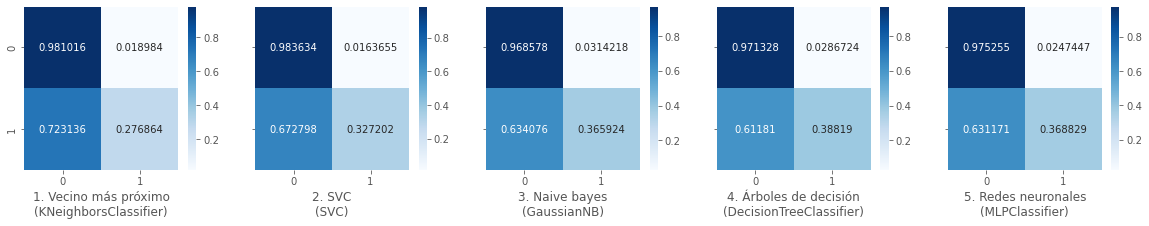

In [167]:
# Definir el área del gráfico
plt.rcParams['figure.figsize'] = (20,3)

# Definir que serán 5 gráficos. Uno por cada clasificador
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,sharey=True)

# Mostrar el mapa de calor para Vecino más próximo
g1 = sn.heatmap(confusion_matrix(Y_test, Y_test_predict_kn, normalize='true'), annot=True, fmt='g', cmap='Blues', ax=ax1)
g1.set_xlabel('1. Vecino más próximo\n(KNeighborsClassifier)')

# Mostrar el mapa de calor para SVC
g2 = sn.heatmap(confusion_matrix(Y_test, Y_test_predict_svc, normalize='true'), annot=True, fmt='g', cmap='Blues', ax=ax2)
g2.set_xlabel('2. SVC\n(SVC)')

# Mostrar el mapa de calor para Naive bayes
g3 = sn.heatmap(confusion_matrix(Y_test, Y_test_predict_nb, normalize='true'), annot=True, fmt='g', cmap='Blues', ax=ax3)
g3.set_xlabel('3. Naive bayes\n(GaussianNB)')

# Mostrar el mapa de calor para Árboles de decisión
g4 = sn.heatmap(confusion_matrix(Y_test, Y_test_predict_dt, normalize='true'), annot=True, fmt='g', cmap='Blues', ax=ax4)
g4.set_xlabel('4. Árboles de decisión\n(DecisionTreeClassifier)')

# Mostrar el mapa de calor para Redes neuronales
g5 = sn.heatmap(confusion_matrix(Y_test, Y_test_predict_mlp, normalize='true'), annot=True, fmt='g', cmap='Blues', ax=ax5)
g5.set_xlabel('5. Redes neuronales\n(MLPClassifier)')

#### 5.2. Curva ROC

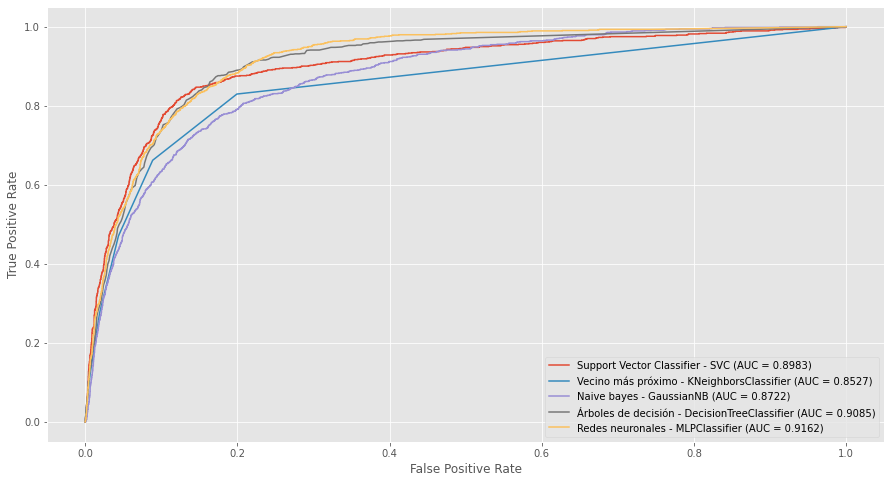

In [171]:
# Definir el área del gráfico
plt.rcParams['figure.figsize'] = (15,8)

# Mostrar el mapa de calor para SVC
fpr_svc, tpr_svc, _ = metrics.roc_curve(Y_test, Y_test_predict_proba_svc)
auc_svc = round(metrics.roc_auc_score(Y_test, Y_test_predict_proba_svc), 4)
plt.plot(fpr_svc, tpr_svc, label = "Support Vector Classifier - SVC (AUC = " + str(auc_svc) + ")")

# Mostrar el mapa de calor para Vecino más próximo
fpr_kn, tpr_kn, _ = metrics.roc_curve(Y_test, Y_test_predict_proba_kn)
auc_kn = round(metrics.roc_auc_score(Y_test, Y_test_predict_proba_kn), 4)
plt.plot(fpr_kn, tpr_kn, label = "Vecino más próximo - KNeighborsClassifier (AUC = " + str(auc_kn) + ")")

# Mostrar el mapa de calor para Naive bayes
fpr_nb, tpr_nb, _ = metrics.roc_curve(Y_test, Y_test_predict_proba_nb)
auc_nb = round(metrics.roc_auc_score(Y_test, Y_test_predict_proba_nb), 4)
plt.plot(fpr_nb, tpr_nb, label = "Naive bayes - GaussianNB (AUC = " + str(auc_nb) + ")")

# Mostrar el mapa de calor para Árboles de decisión
fpr_dt, tpr_dt, _ = metrics.roc_curve(Y_test, Y_test_predict_proba_dt)
auc_dt = round(metrics.roc_auc_score(Y_test, Y_test_predict_proba_dt), 4)
plt.plot(fpr_dt, tpr_dt, label = "Árboles de decisión - DecisionTreeClassifier (AUC = " + str(auc_dt) + ")")

# Mostrar el mapa de calor para Redes neuronales
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Y_test, Y_test_predict_proba_mlp)
auc_mlp = round(metrics.roc_auc_score(Y_test, Y_test_predict_proba_mlp), 4)
plt.plot(fpr_mlp, tpr_mlp, label = "Redes neuronales - MLPClassifier (AUC = " + str(auc_mlp) + ")")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#### 5.3. Curva RECALL

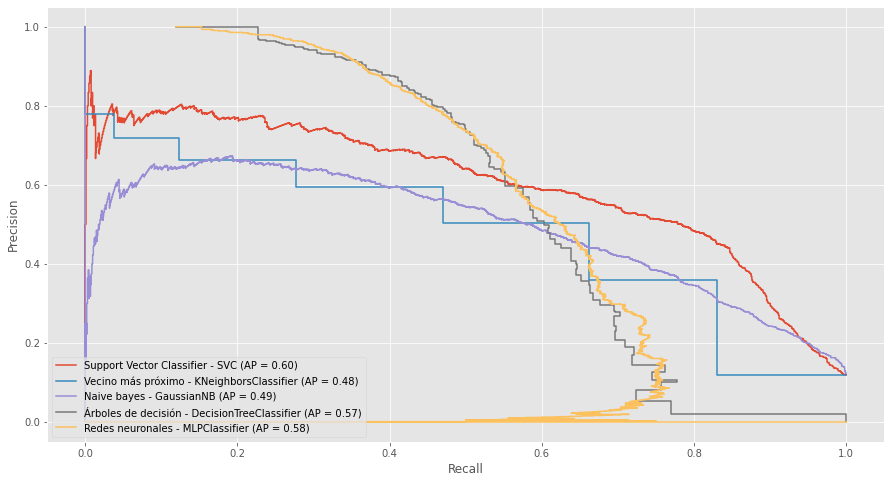

In [170]:
# Definir el área del gráfico
_, ax = plt.subplots(figsize=(15, 8))

# Mostrar el mapa de calor para SVC
precision_svc, recall_svc, _ = precision_recall_curve(Y_test, Y_test_predict_proba_svc)
average_precision_svc = average_precision_score(Y_test, Y_test_predict_proba_svc)

display_svc = PrecisionRecallDisplay(
    recall=recall_svc,
    precision=precision_svc,
    average_precision=average_precision_svc,
)
display_svc.plot(ax=ax, name="Support Vector Classifier - SVC")

# Mostrar el mapa de calor para Vecino más próximo
precision_kn, recall_kn, _ = precision_recall_curve(Y_test, Y_test_predict_proba_kn)
average_precision_kn = average_precision_score(Y_test, Y_test_predict_proba_kn)

display_kn = PrecisionRecallDisplay(
    recall=recall_kn,
    precision=precision_kn,
    average_precision=average_precision_kn,
)
display_kn.plot(ax=ax, name="Vecino más próximo - KNeighborsClassifier")

# Mostrar el mapa de calor para Naive bayes
precision_nb, recall_nb, _ = precision_recall_curve(Y_test, Y_test_predict_proba_nb)
average_precision_nb = average_precision_score(Y_test, Y_test_predict_proba_nb)

display_nb = PrecisionRecallDisplay(
    recall=recall_nb,
    precision=precision_nb,
    average_precision=average_precision_nb,
)
display_nb.plot(ax=ax, name="Naive bayes - GaussianNB")

# Mostrar el mapa de calor para Árboles de decisión
precision_dt, recall_dt, _ = precision_recall_curve(Y_test, Y_test_predict_proba_dt)
average_precision_dt = average_precision_score(Y_test, Y_test_predict_proba_dt)

display_dt = PrecisionRecallDisplay(
    recall=precision_dt,
    precision=recall_dt,
    average_precision=average_precision_dt,
)
display_dt.plot(ax=ax, name="Árboles de decisión - DecisionTreeClassifier")

# Mostrar el mapa de calor para Redes neuronales
precision_mlp, recall_mlp, _ = precision_recall_curve(Y_test, Y_test_predict_proba_mlp)
average_precision_mlp = average_precision_score(Y_test, Y_test_predict_proba_mlp)

display_mlp = PrecisionRecallDisplay(
    recall=precision_mlp,
    precision=recall_mlp,
    average_precision=average_precision_mlp,
)
display_mlp.plot(ax=ax, name="Redes neuronales - MLPClassifier")

plt.show()

### 6. Conclusions
##### - The classifier with the best Accuracy was "SVC" (kernel = "poly").
##### - Analyzing the confusion matrix and the heat map, the "SVC" classifier had a FN rate = 67.27% and a FP rate = 1.63%, while the "MLPClassifier" classifier had a FN rate = 63.11% and a FP rate = 2.47%.
##### - In the ROC curve it can be seen that the "MLPClassifier" classifier curves (AUC = 91.62%).
##### - The RECALL curve shows that the "SVC" classifier curve (AP = 60%) has a larger area than the others.
##### - The objective of having a classifier is to predict or estimate the efforts needed to achieve the goals in a future marketing campaign, therefore it is paramount to choose a classifier that has the lowest FN rate and a high VP rate. After analyzing the best classifiers, among them the best classifier is "MLPClassifier" using neural networks; although it does not have the best Accuracy, it is the one with the lowest FN rate, an indicator that provides greater confidence in predicting the success of the marketing campaign.

In [161]:
df_result_testing_winner = df_result_testing.loc[best_model_index_mlp]
df_result_testing_winner

Método              MLPClassifier
Parámetros        activation=relu
Iteración                       4
Test Shape             (8671, 46)
Train Accuracy           90.8881%
Test Accuracy            90.3010%
Mejor                           0
Name: MLPR4, dtype: object